## Task 1 - Familiarization

In [6]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import rcParams
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('Solarize_Light2')
style.use('Solarize_Light2')
%matplotlib inline
print(plt.style.available)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
rcParams['figure.figsize'] = 6,5

['seaborn-notebook', 'seaborn-deep', 'tableau-colorblind10', 'seaborn-colorblind', 'dark_background', 'seaborn-dark', 'seaborn-paper', 'seaborn-muted', '_classic_test', 'seaborn-ticks', 'fast', 'seaborn-darkgrid', 'seaborn', 'seaborn-pastel', 'bmh', 'seaborn-whitegrid', 'seaborn-poster', 'Solarize_Light2', 'ggplot', 'fivethirtyeight', 'classic', 'seaborn-white', 'seaborn-bright', 'seaborn-talk', 'seaborn-dark-palette', 'grayscale']


In [7]:
df = pd.DataFrame(pd.read_csv('BATADAL_trainingset1.csv')) # No attacks
df_attacks = pd.DataFrame(pd.read_csv('BATADAL_trainingset2.csv')) # With attacks
df_nolabels = pd.DataFrame(pd.read_csv('BATADAL_test_dataset.csv')) # With attacks no labels
pd.set_option('display.expand_frame_repr', False)
df.describe()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.0,8761.000000,...,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.0
mean,2.676905,3.285748,4.201820,3.568129,2.748205,5.370437,3.302672,100.926032,1.0,69.464357,...,79.411082,27.776600,82.737615,24.453808,74.459039,24.362250,67.921632,33.755911,29.453266,0.0
std,1.202940,1.468621,0.678465,0.539656,0.735162,0.177459,0.828849,10.048618,0.0,42.239742,...,8.461924,2.720291,7.502937,4.416089,9.974357,4.438203,5.321227,4.232716,2.658146,0.0
min,0.320112,0.293876,2.882847,2.002133,1.293241,4.824605,1.054194,85.495201,1.0,0.000000,...,65.059624,20.690191,54.757198,14.797167,58.325397,14.541955,51.697071,27.649677,22.370066,0.0
25%,1.650647,2.131776,3.623394,3.139640,2.123508,5.248147,2.631062,94.342598,1.0,0.000000,...,71.978676,26.674088,83.912292,20.516289,62.949253,20.409576,66.718307,30.668709,28.432796,0.0
50%,2.798855,3.498371,4.240439,3.574840,2.758198,5.500000,3.252838,96.729073,1.0,94.075195,...,75.879807,28.110842,85.219460,22.969397,81.176102,22.856150,68.807007,32.222023,29.834288,0.0
75%,3.754744,4.570782,4.793697,4.009889,3.372392,5.500000,3.986883,112.294952,1.0,96.614708,...,88.221329,29.553995,86.416519,28.457081,82.673698,28.382421,71.218712,38.134647,31.275637,0.0
max,4.871329,5.663802,5.433022,4.690665,4.162726,5.500000,4.999618,122.705627,1.0,100.140671,...,94.961258,33.763836,105.951820,36.325947,89.053986,36.325947,96.180450,45.388145,35.161724,0.0


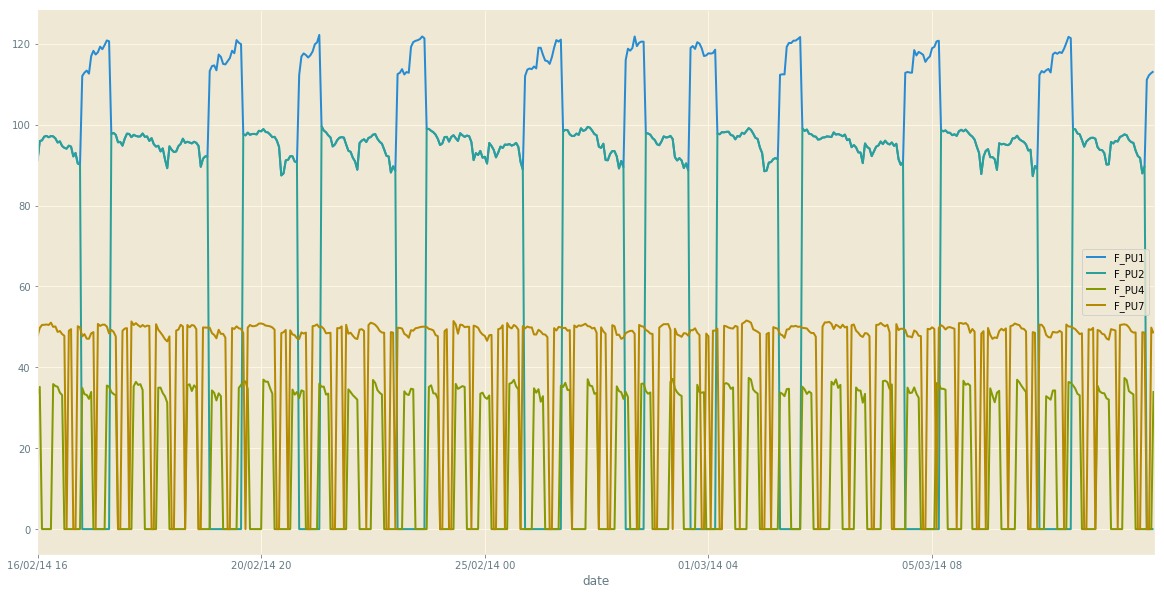

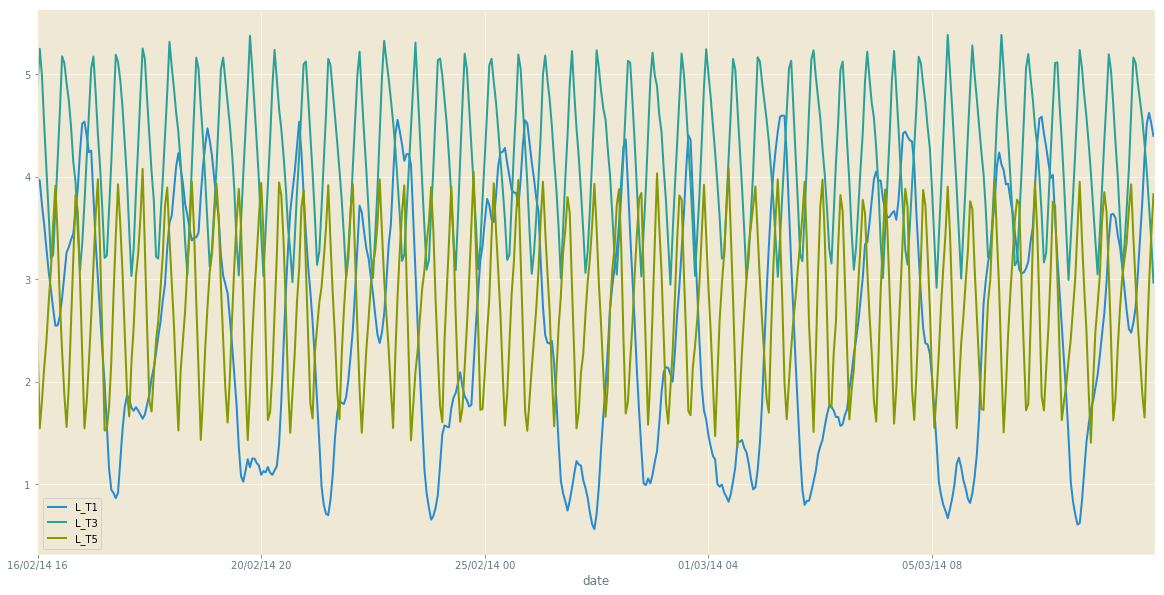

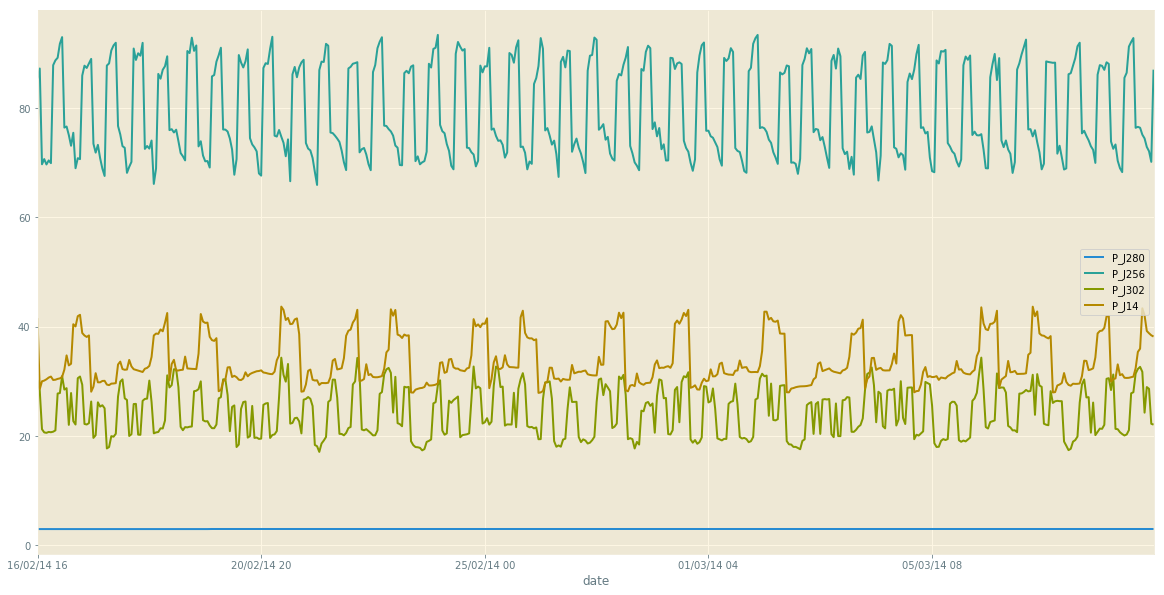

In [8]:
data_preproc = pd.DataFrame({
    'date': df["DATETIME"],
    'F_PU1': df["F_PU1"],
    'F_PU2': df["F_PU2"],
    'F_PU4': df["F_PU4"],
    'F_PU7': df["F_PU7"],
})[1000:1500]
data_preproc2 = pd.DataFrame({
    'date': df["DATETIME"],
    'L_T1': df["L_T1"],
    'L_T3': df["L_T3"],
    'L_T5': df["L_T5"],
})[1000:1500]
data_preproc3 = pd.DataFrame({
    'date': df["DATETIME"],
    'P_J280': df["P_J280"],
    'P_J256': df["P_J256"],
    'P_J302': df["P_J302"],
    'P_J14': df["P_J14"],
})[1000:1500]

data_preproc.plot(figsize=(20,10), x='date')
data_preproc2.plot(figsize=(20,10), x='date')
data_preproc3.plot(figsize=(20,10), x='date')

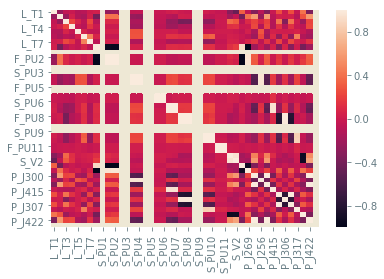

1    8761
Name: S_PU1, dtype: int64
0    8761
Name: F_PU3, dtype: int64
0    8761
Name: S_PU3, dtype: int64
0    8761
Name: F_PU5, dtype: int64
0    8761
Name: S_PU5, dtype: int64
0    8761
Name: F_PU9, dtype: int64
0    8761
Name: S_PU9, dtype: int64
0    8761
Name: ATT_FLAG, dtype: int64


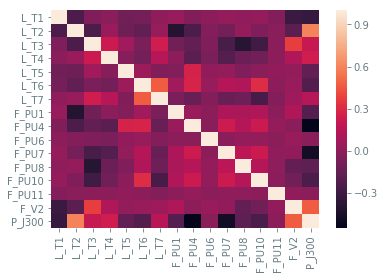

In [9]:
sns.heatmap(df.corr())
values = df['F_PU1']
plt.show()

# Remove all columns with a perfect correlation: 
perfect_cor = ['S_PU1', 'F_PU3', 'S_PU3', 'F_PU5', 'S_PU5', 'F_PU9', 'S_PU9', 'ATT_FLAG']
# check all the removed columns on their data (they all contain exactly the same value everywhere so they can be removed)
final_columns = list(df.columns)
for col in perfect_cor:
    print(df[col].value_counts())
    final_columns.remove(col)

def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

new_df = trimm_correlated(df[final_columns], 0.8)
sns.heatmap(new_df.corr())

F_PU1 window 1
Test MSE: 22.529
F_PU1 window 2
Test MSE: 28.055
F_PU1 window 3
Test MSE: 34.441
F_PU1 window 4
Test MSE: 41.027
P_J14 window 1
Test MSE: 7.821
P_J14 window 2
Test MSE: 9.263
P_J14 window 3
Test MSE: 10.744
P_J14 window 4
Test MSE: 12.223
L_T1 window 1
Test MSE: 0.055
L_T1 window 2
Test MSE: 0.117
L_T1 window 3
Test MSE: 0.195
L_T1 window 4
Test MSE: 0.286


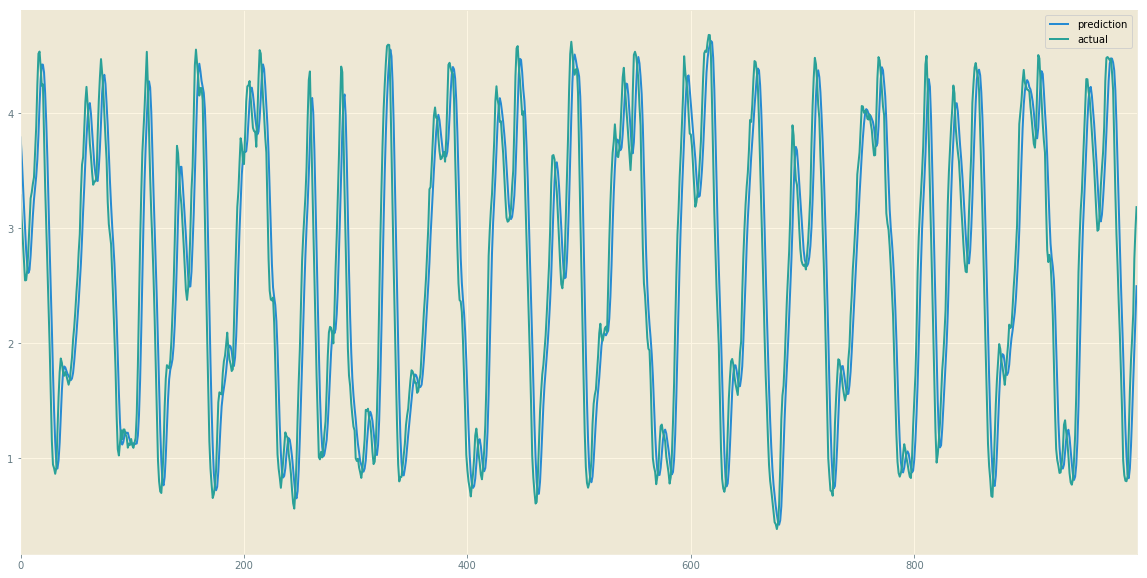

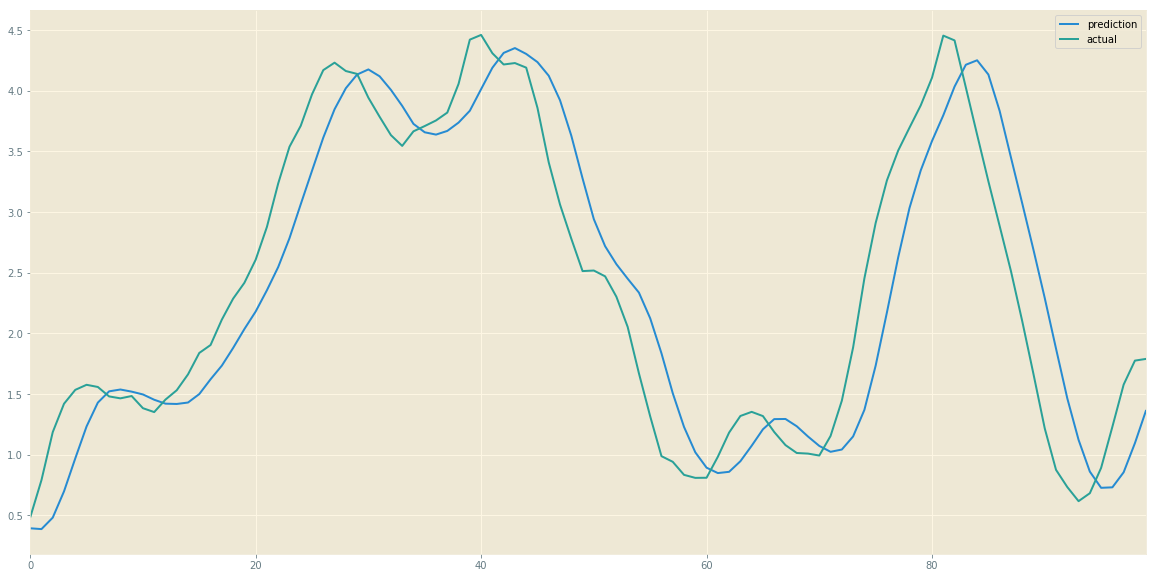

In [10]:
from numpy import mean
from sklearn.metrics import mean_squared_error

def moving_average_prediction(data, window = 3):
    test = [data[i] for i in range(window, len(data))]
    predictions = []
    
    current_prediction = window
    for t in range(len(test)):
        predicted_value = mean([data[i] for i in range(current_prediction-window,current_prediction)])
        predictions.append(predicted_value)
        current_prediction += 1
    # 	print('predicted=%f, expected=%f' % (yhat, obs))
    
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    return test, predictions


print('F_PU1 window 1')
data, predictions = moving_average_prediction(df['F_PU1'].values, 1)
print('F_PU1 window 2')
data, predictions = moving_average_prediction(df['F_PU1'].values, 2)
print('F_PU1 window 3')
data, predictions = moving_average_prediction(df['F_PU1'].values, 3)
print('F_PU1 window 4')
data, predictions = moving_average_prediction(df['F_PU1'].values, 4)

print('P_J14 window 1')
data, predictions = moving_average_prediction(df['P_J14'].values, 1)
print('P_J14 window 2')
data, predictions = moving_average_prediction(df['P_J14'].values, 2)
print('P_J14 window 3')
data, predictions = moving_average_prediction(df['P_J14'].values, 3)
print('P_J14 window 4')
data, predictions = moving_average_prediction(df['P_J14'].values, 4)

print('L_T1 window 1')
data, predictions = moving_average_prediction(df['L_T1'].values, 1)
print('L_T1 window 2')
data, predictions = moving_average_prediction(df['L_T1'].values, 2)
print('L_T1 window 3')
data, predictions = moving_average_prediction(df['L_T1'].values, 3)
print('L_T1 window 4')
data, predictions = moving_average_prediction(df['L_T1'].values, 4)

# plots
pd.DataFrame({"prediction":predictions[1000:2000],
            "actual": data[1000:2000]}).plot(figsize=(20,10))
# zoom plot
pd.DataFrame({"prediction":predictions[:100],
            "actual": data[:100]}).plot(figsize=(20,10))

# Task 2 - ARMA

In [11]:
%pip install scipy

# Make sure you have statsmodels >0.9.0 as it fails to import statsmodels.api
# see https://github.com/statsmodels/statsmodels/issues/5759
%pip install git+https://github.com/statsmodels/statsmodels

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-8u54bzs7
^C
Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
# from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

mpl.rcParams['figure.dpi'] = 150
rcParams['figure.figsize'] = 6,5

# Reload dataset to make sure any changes are reset
df = pd.DataFrame(pd.read_csv('BATADAL_trainingset1.csv')) # No attacks
df_attacks = pd.DataFrame(pd.read_csv('BATADAL_trainingset2.csv')) # With attacks
df_nolabels = pd.DataFrame(pd.read_csv('BATADAL_test_dataset.csv')) # With attacks no labels
pd.set_option('display.expand_frame_repr', False)

## Autocorrelation function
We calculate the autocorrelation and partial autocorrelation functions to make an informed descision about what ARMA parameters to use.

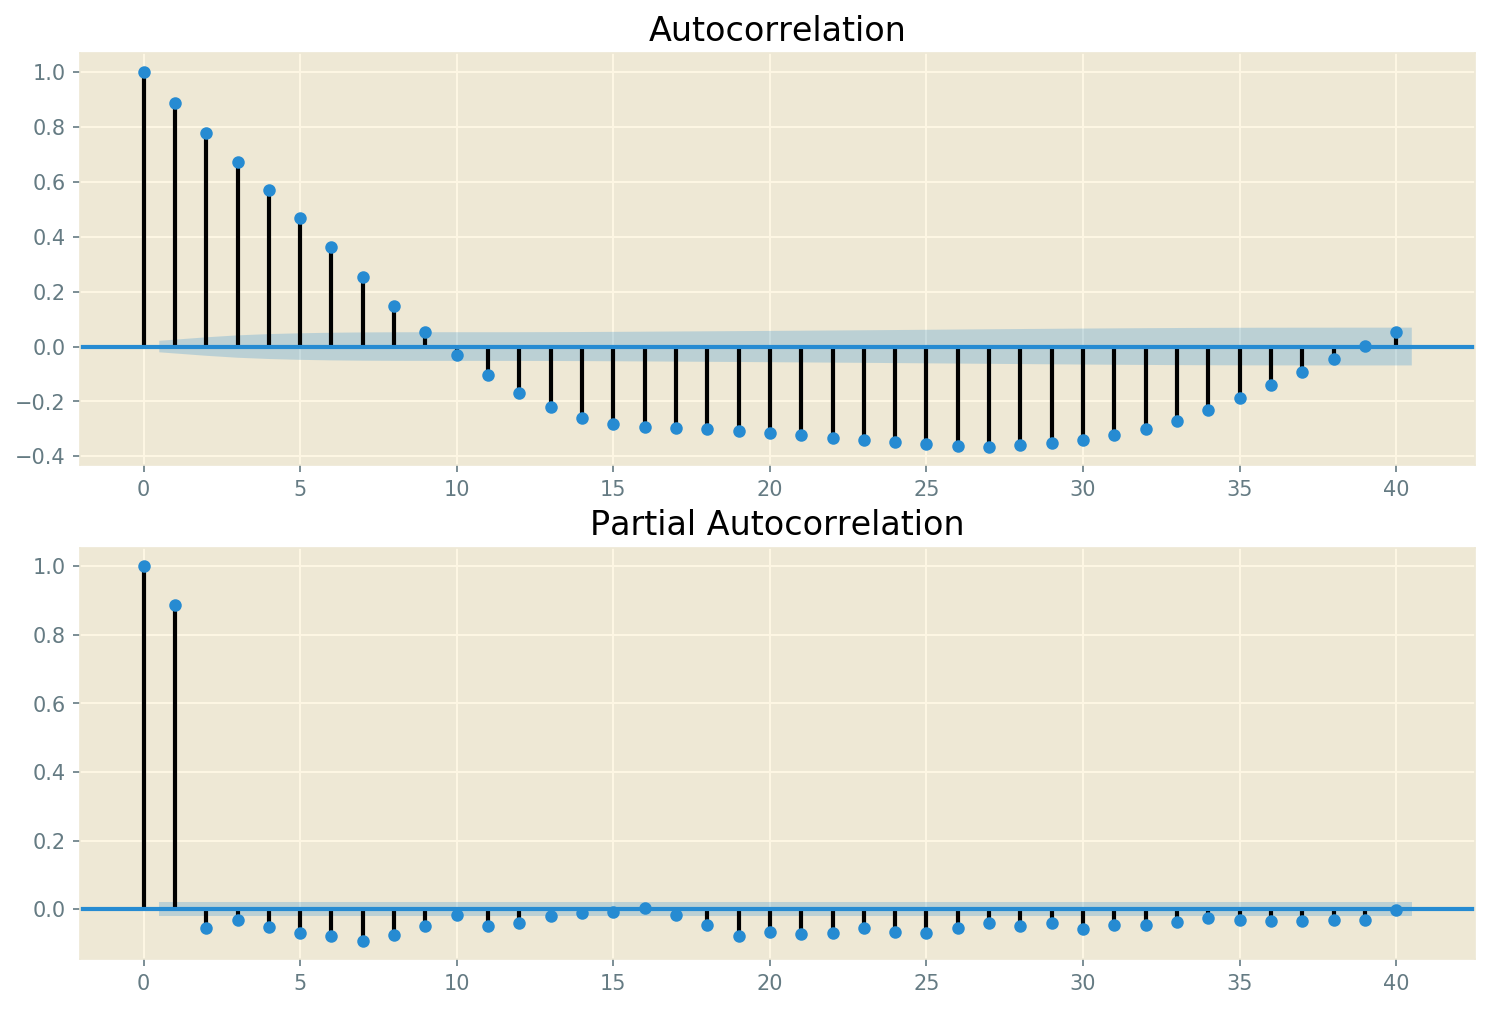

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# from statsmodels.graphics.tsaplots import plot_acf
fig = sm.graphics.tsa.plot_acf(df['F_PU1'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['F_PU1'], lags=40, ax=ax2)

To determine the ARMA parameters we use the following rules of thumb:
- Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter
- Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters
- Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter.
- Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.
- Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.

Looking at the graphs above, we conclude that rule 2 seems to apply best to out data. Thus, we will use 2 autoregressive and no moving average parameters.

In [50]:
# "The higher the AR order gets, the lower the AIC gets." you care about the rate of change. When the AIC does not drop substantially with the increase of an AR term, the search can stop for that sensor. 
def test_arma_params(train_series, params):
    # Find optimal parameters based on AIC 
    arma_mod = sm.tsa.ARMA(train_series, (0,0)).fit()
    
    zero_aic = arma_mod.aic
    best_params = params[0]
    lowest_aic = arma_mod.aic
    prev_aic = arma_mod.aic
    
    print(f"first aic is {prev_aic}")
    for param_set in params:
        print("testing " + str(param_set))
        try:
            arma_mod = sm.tsa.ARMA(train_series, param_set).fit()
            print(str(arma_mod.aic))
        except:
            continue
        print(f"Change: {arma_mod.aic - prev_aic}, change vs first: {arma_mod.aic - zero_aic}")
        prev_aic = arma_mod.aic
        if arma_mod.aic < lowest_aic:
            lowest_aic = arma_mod.aic
            best_params = param_set
            
    print('best params: ' + str(best_params))


def do_arma(train_series, test_series, params, attack_flags):
    print(f'####################################\nCurrent Series: {train_series.name}\n####################################')
    train_model = sm.tsa.ARMA(train_series, params).fit()#method='mle', trend='nc')
    test_model = sm.tsa.ARMA(test_series, params).fit(start_params = train_model.params)#, transpars = False, method='mle', trend='nc')

    #The equations are somewhat simpler if the time series is first reduced to zero-mean by subtracting the sample mean. Therefore, we will work with the mean-adjusted series

    # Plotting the residuals
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    resid = test_model.resid
    ax = resid.plot(ax=ax);

    # +
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    fig = qqplot(resid, line='q', ax=ax, fit=True)
    # -

#     stats.normaltest(resid)

    # ## ARMA Model Autocorrelation
    print("Autocorrelation plots:")
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

    # ## Prediction
#     prediction = test_model.predict()
#     pd.DataFrame({"prediction":prediction[100:400],
#                 "actual": train_series[100:400]}).plot(figsize=(20,10))

    # ## Anomaly detection    
#     train_resid = np.square(train_model.resid)
#     t_max = np.max(train_resid)
#     t_min = np.min(train_resid)
    
    resid = test_model.resid
    std = np.std(resid)
    anomaly_thresh = 2 * std
    detected_anomalies = test_model.resid[(resid) > anomaly_thresh]
#     arma_residuals = np.square(test_model.resid)
#     print(arma_residuals)
#     print(f"tmin={t_min}\ntmax={t_max}")
#     arma_residuals = arma_residuals.sum()
#     all_detected_attacks = np.where((arma_residuals > t_max or arma_residuals < t_min))
#     TP = 0
#     FP = 0
#     for index in all_detected_attacks:
#         if index in list(df_attacks.loc[df_attacks[' ATT_FLAG']==1].index):
#             TP +=1
#         else:
#             FP +=1 
#     print(f"TP={TP}, FP={FP}")
    
    test_model = pd.DataFrame({ 'ATT_FLAG': attack_flags })
    tp=0
    fp=0
    for index, _ in detected_anomalies.items():
        if attack_flags[index]==1:
            tp+=1
        else:
            fp+=1
    tn=test_model.loc[attack_flags==-999].shape[0]-fp
    fn=test_model.loc[attack_flags==1].shape[0]-tp
    Accuracy=100.0*(tp+tn)/(tp+tn+fp+fn)
    if (tp+fp)!=0:
        Precision=100.0*tp / (tp + fp)
    else:
        Precision=0
    Recall = 100.0*tp / (tp + fn)
    F_score = 100.0*2*tp /(2*tp + fp + fn)
    print ("TP:", tp)
    print ("FP:", fp)
    print("Accuracy: %.2f" % Accuracy)
    print("Precision: %.2f" % Precision)
    print("Recall: %.2f" %Recall)
    print("F_score: %.2f" % F_score)
    print('  ')
    return detected_anomalies, resid

In [62]:
def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def plot_attacks(residuals, attacks, detected_anomalies, show_range = (0,5000)):
    show_from = show_range[0]
    show_to = show_range[1]
    detected_attacks = []
    for a in range(len(df_attacks)):
            if a in detected_anomalies:
                detected_attacks.append(0.7)
            else:
                detected_attacks.append(-999)

    detected_attacks = pd.DataFrame(detected_attacks)
    plt.figure()
    residuals = residuals - np.mean(resid)
    plt.plot(residuals[show_from:show_to], label="residuals")
    plt.plot(attacks[show_from:show_to], label="Attacks")
    plt.plot(detected_attacks[show_from:show_to], label="Detected Atacks")

    axes = plt.gca()
    axes.set_ylim([np.min(residuals)*2,max(np.max(residuals)*1.5, 2)])
    plt.legend()
    plt.show()

####################################
Current Series: F_PU7
####################################
Autocorrelation plots:
TP: 0
FP: 1
Accuracy: 94.73
Precision: 0.00
Recall: 0.00
F_score: 0.00
  


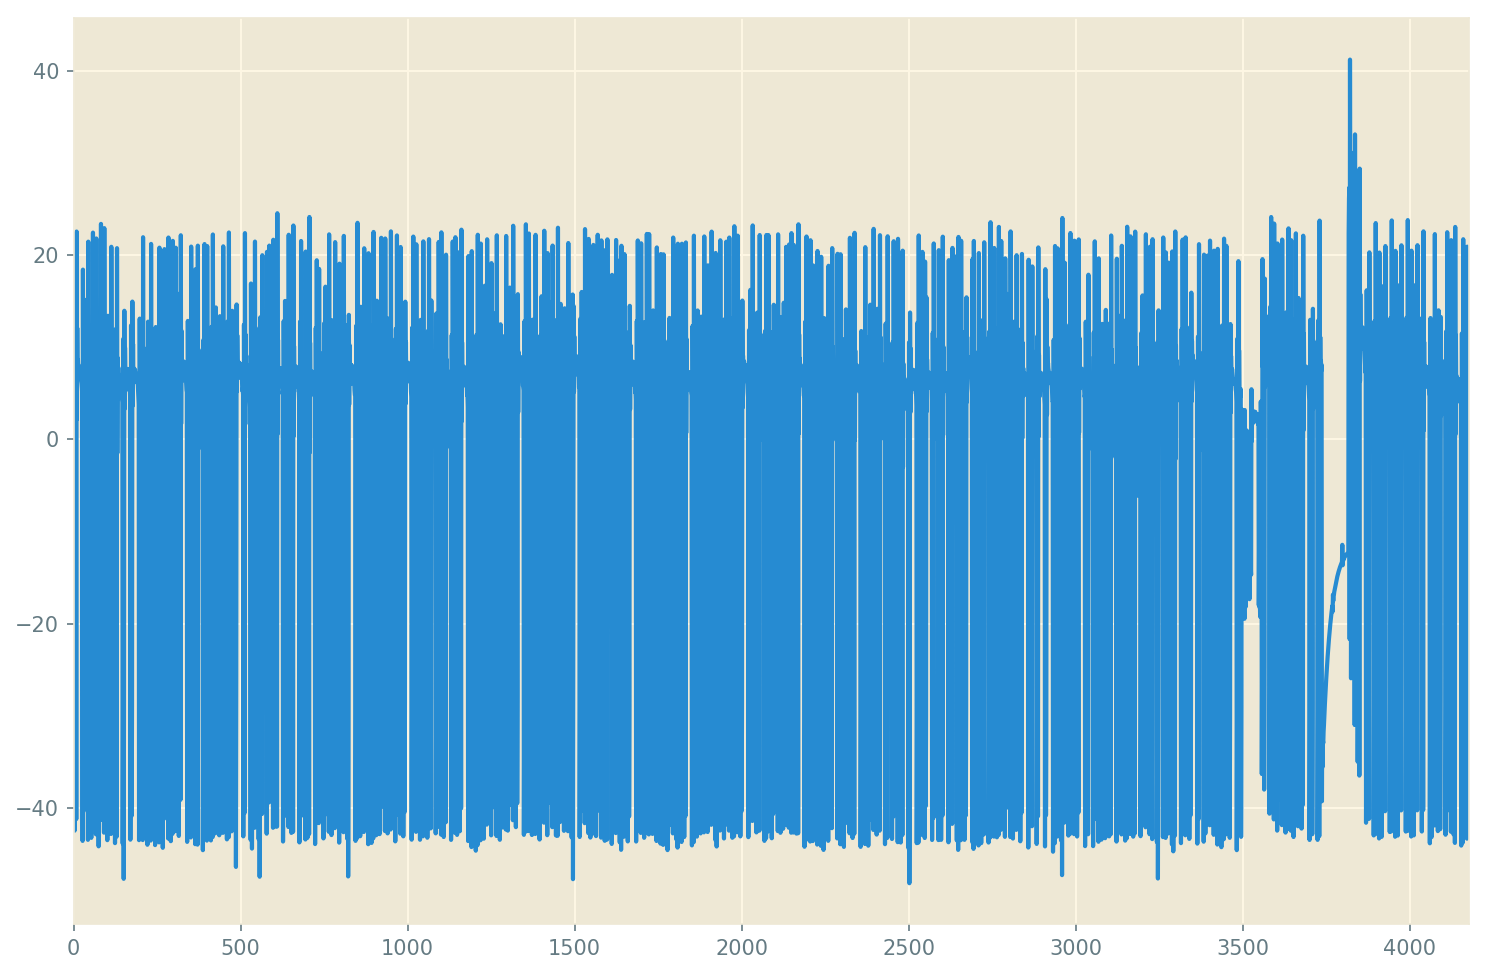

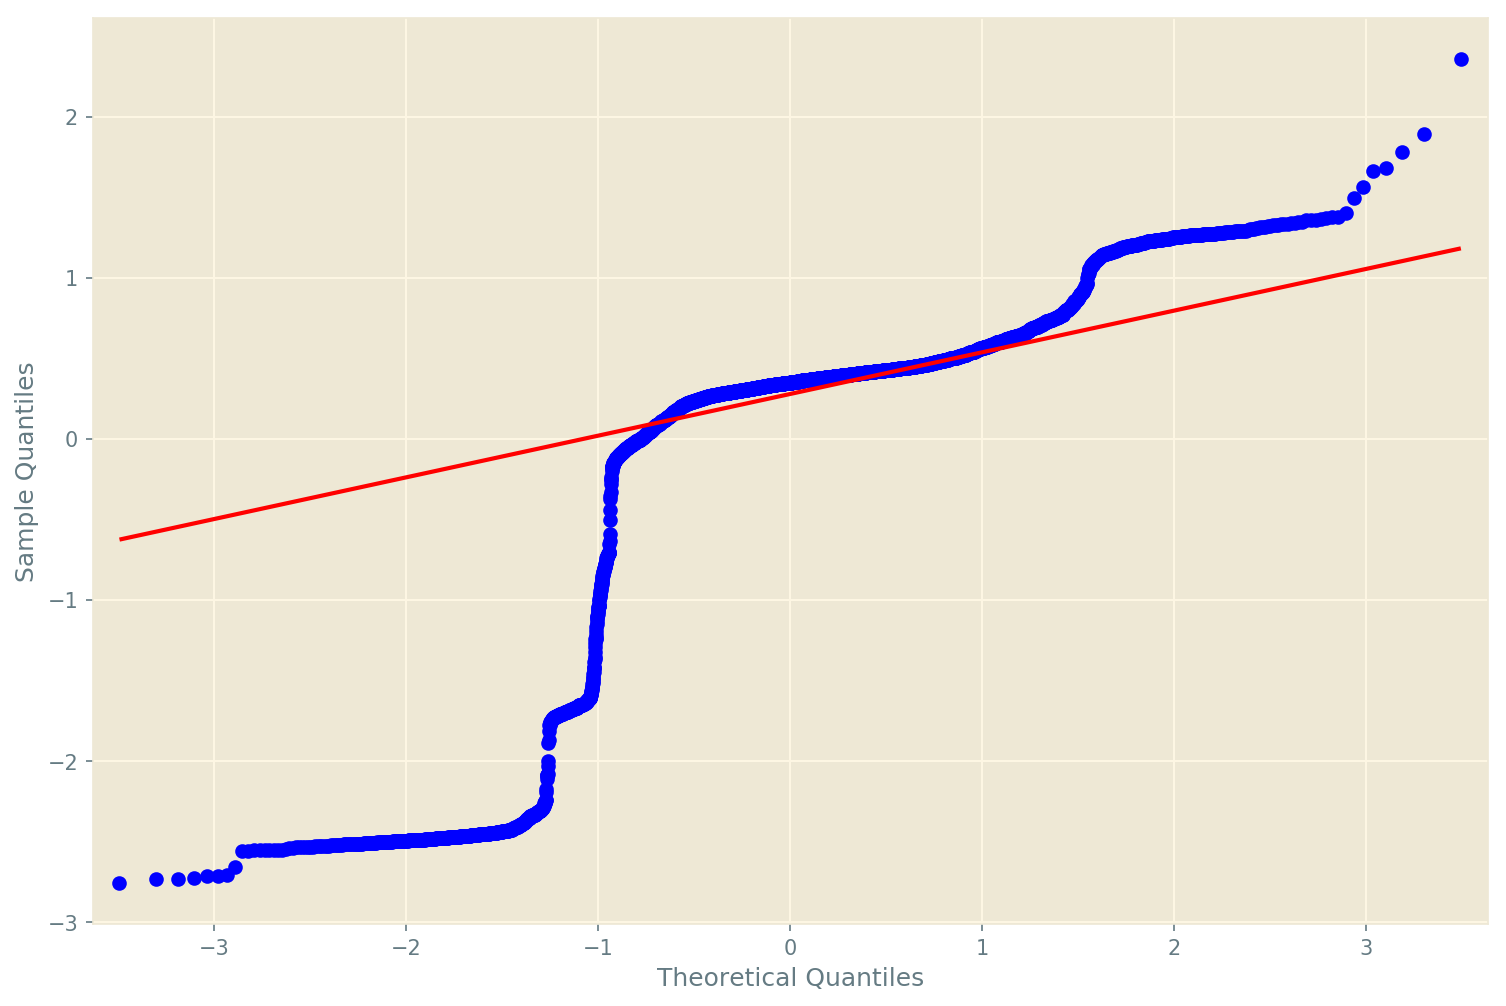

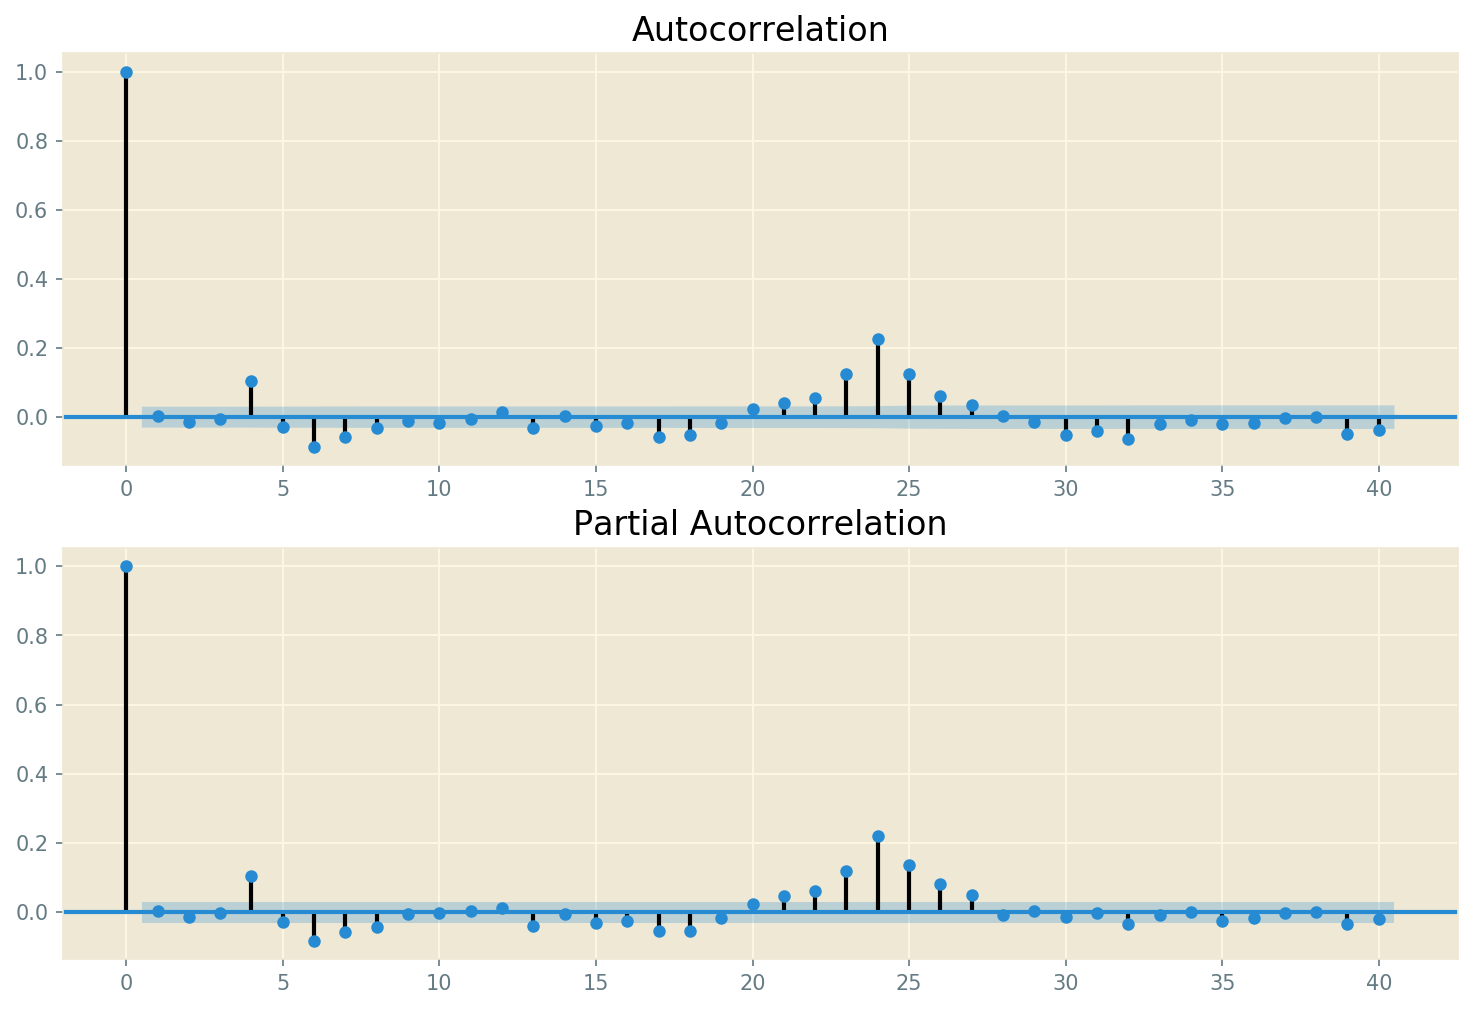

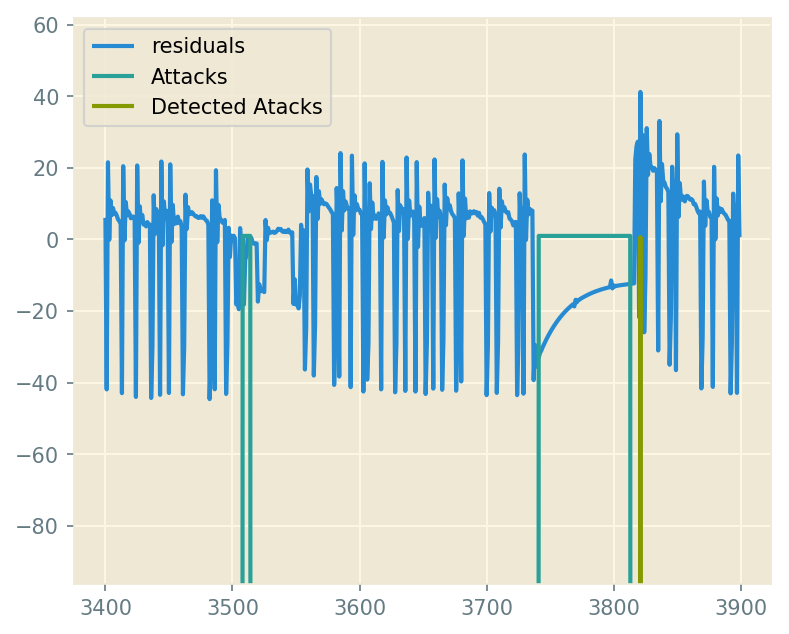

In [70]:
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 4,0
# param_sets = [(4,0), (4,1), (4,2), (4,3), (4,4), (4,5), (4,6), (4,7), (4,8)] # best 4,5
# test_arma_params(df['F_PU7'], param_sets)

anomalies, resid = do_arma(df['F_PU7'], df_attacks[' F_PU7'], (2,3), df_attacks[' ATT_FLAG'])
# Zoom in on especially Attack#6, which attacks F_PU7
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (3400,3900))

# print("MFE = ", mean_forecast_err(df['P_J256'], prediction))
# print("MAE = ", mean_absolute_err(df['P_J256'], prediction))
# print("MSE = ", mean_squared_error(df['P_J256'], prediction))

####################################
Current Series: L_T4
####################################
Autocorrelation plots:
TP: 0
FP: 12
Accuracy: 94.47
Precision: 0.00
Recall: 0.00
F_score: 0.00
  


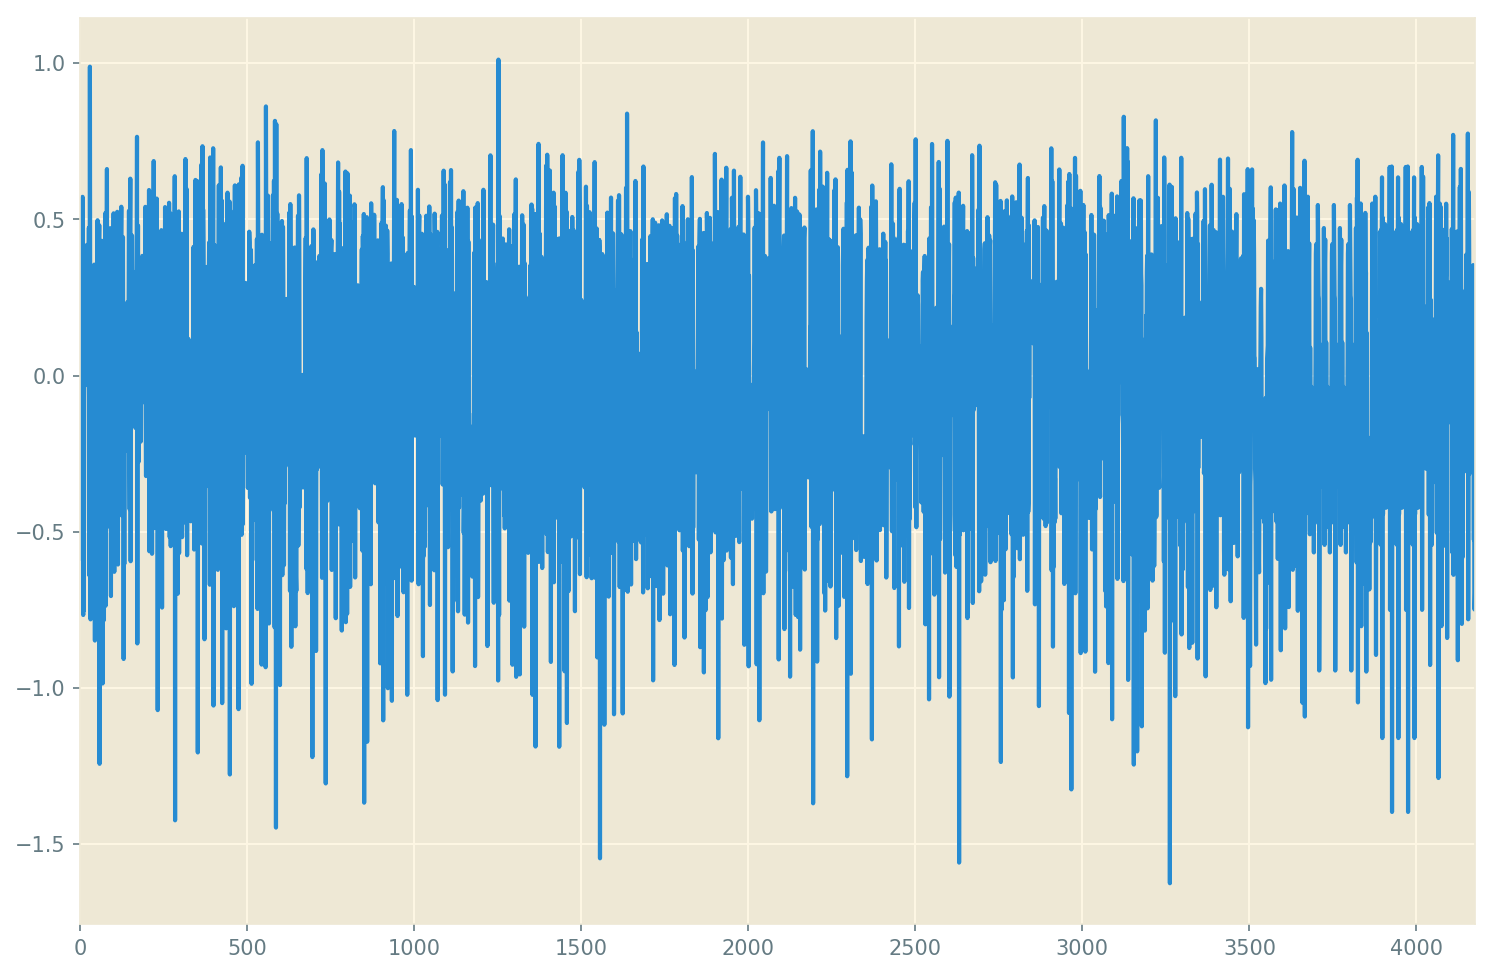

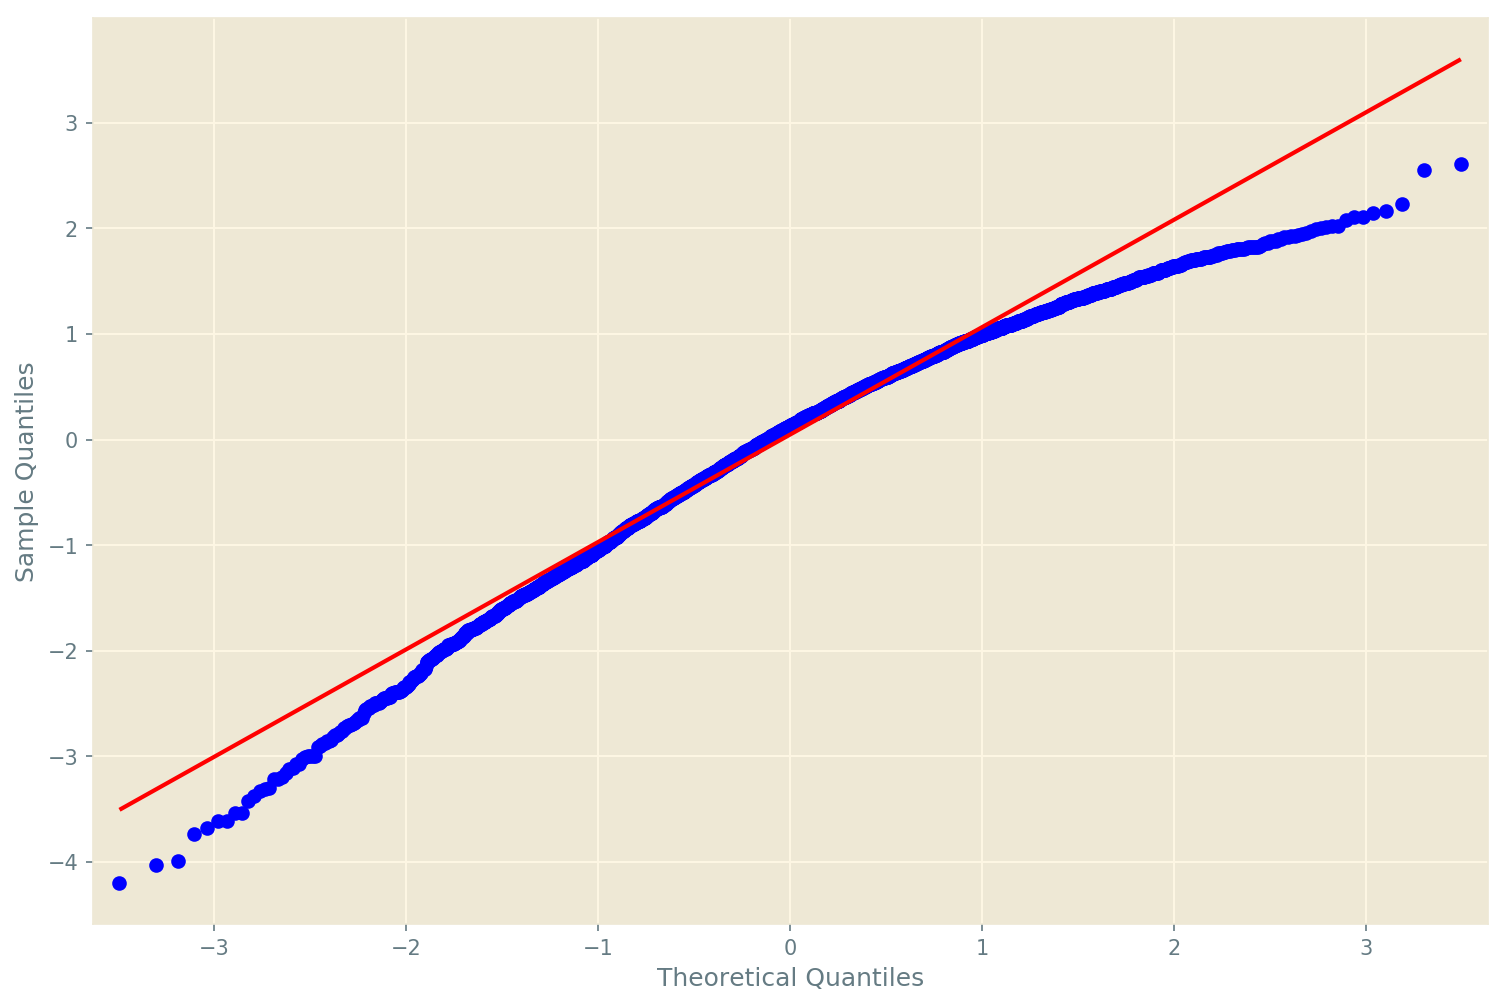

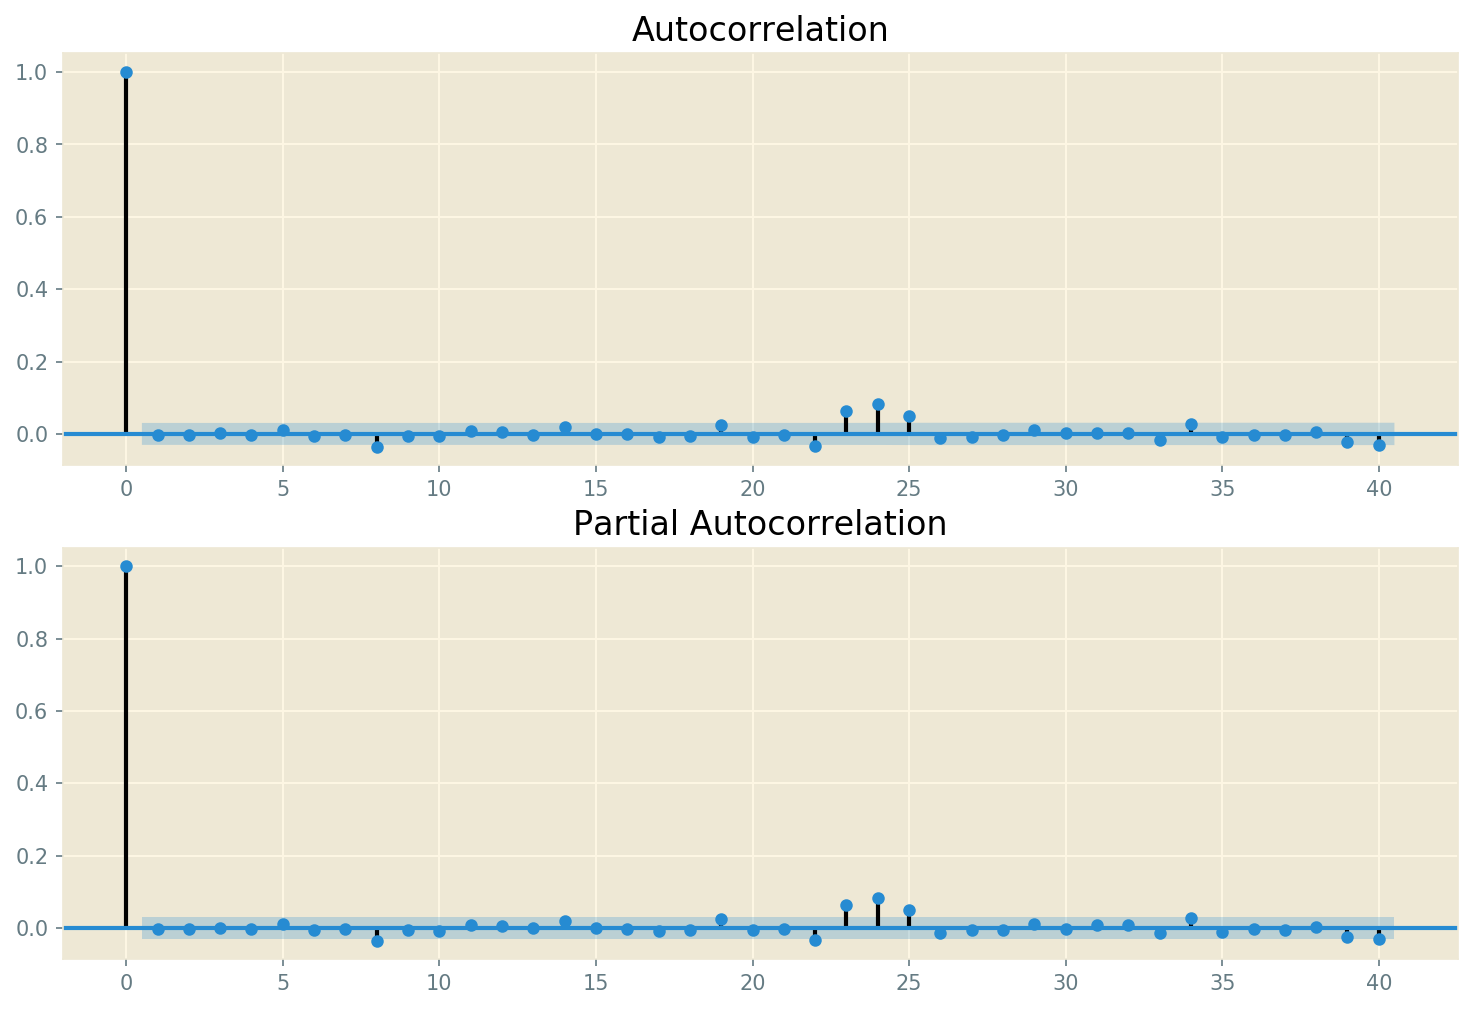

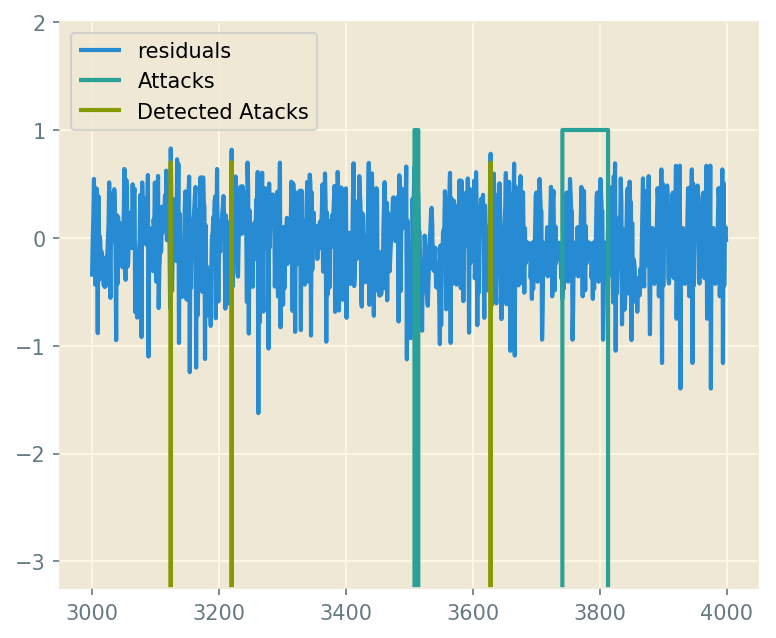

In [75]:
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 5,0
# param_sets = [(5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8)] # best 5,2?
# test_arma_params(df['L_T4'], param_sets)

anomalies, resid = do_arma(df['L_T4'], df_attacks[' L_T4'], (5,2), df_attacks[' ATT_FLAG'])
# Zoom in on especially Attack#5 and 6, which attacks F_PU7, affecting L_T4
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (3000,4000))

####################################
Current Series: L_T1
####################################


/usr/lib/python3.7/site-packages/statsmodels/base/model.py:507: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Autocorrelation plots:
TP: 13
FP: 45
Accuracy: 93.99
Precision: 22.41
Recall: 5.94
F_score: 9.39
  


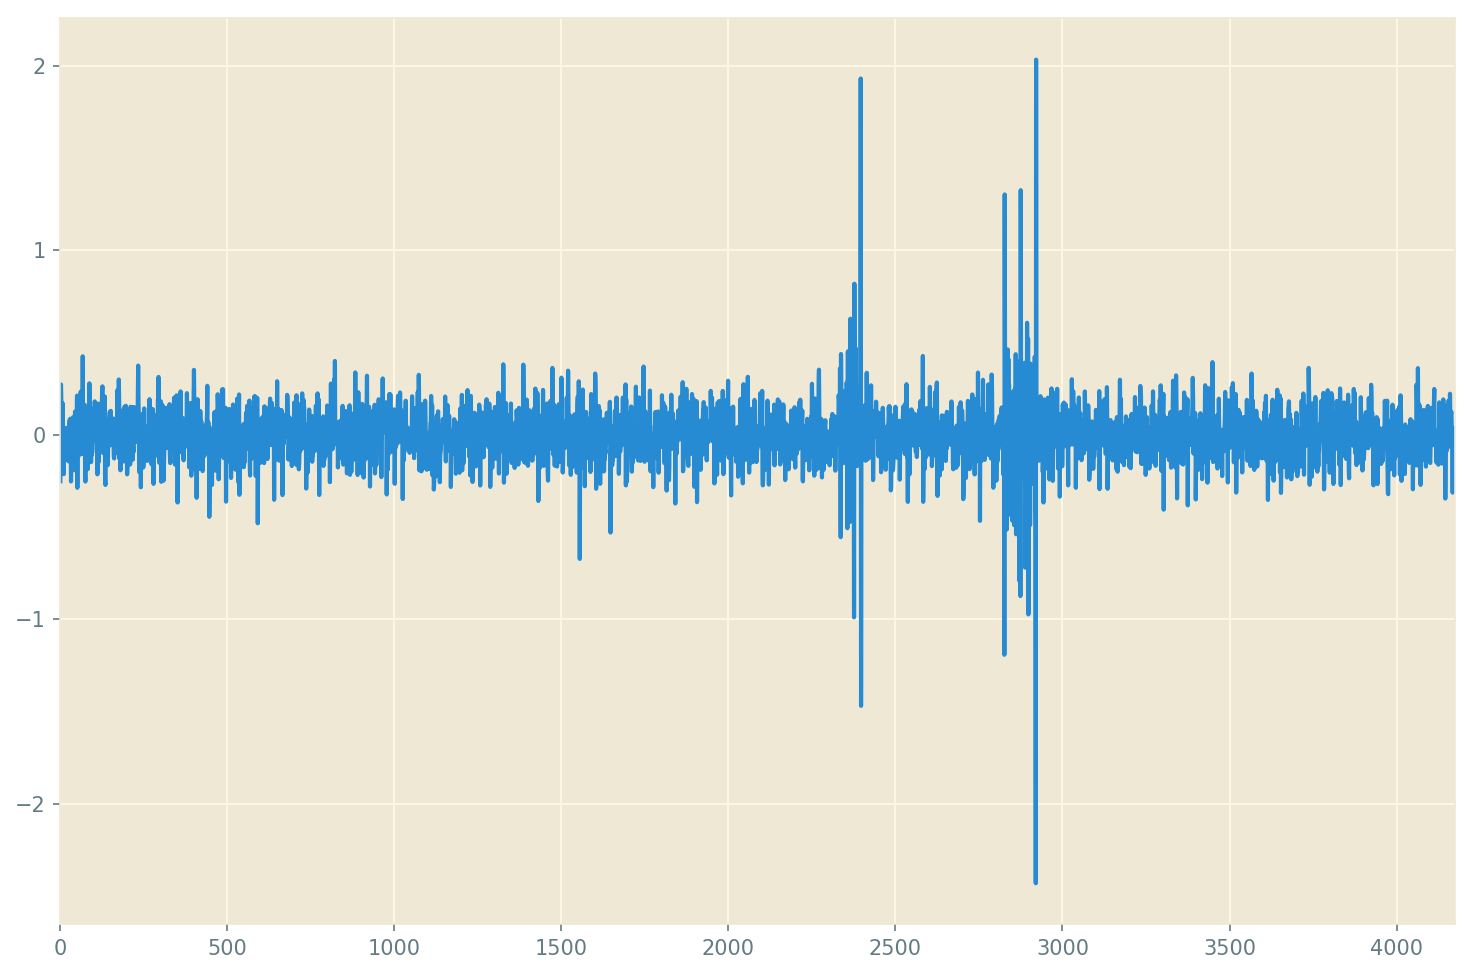

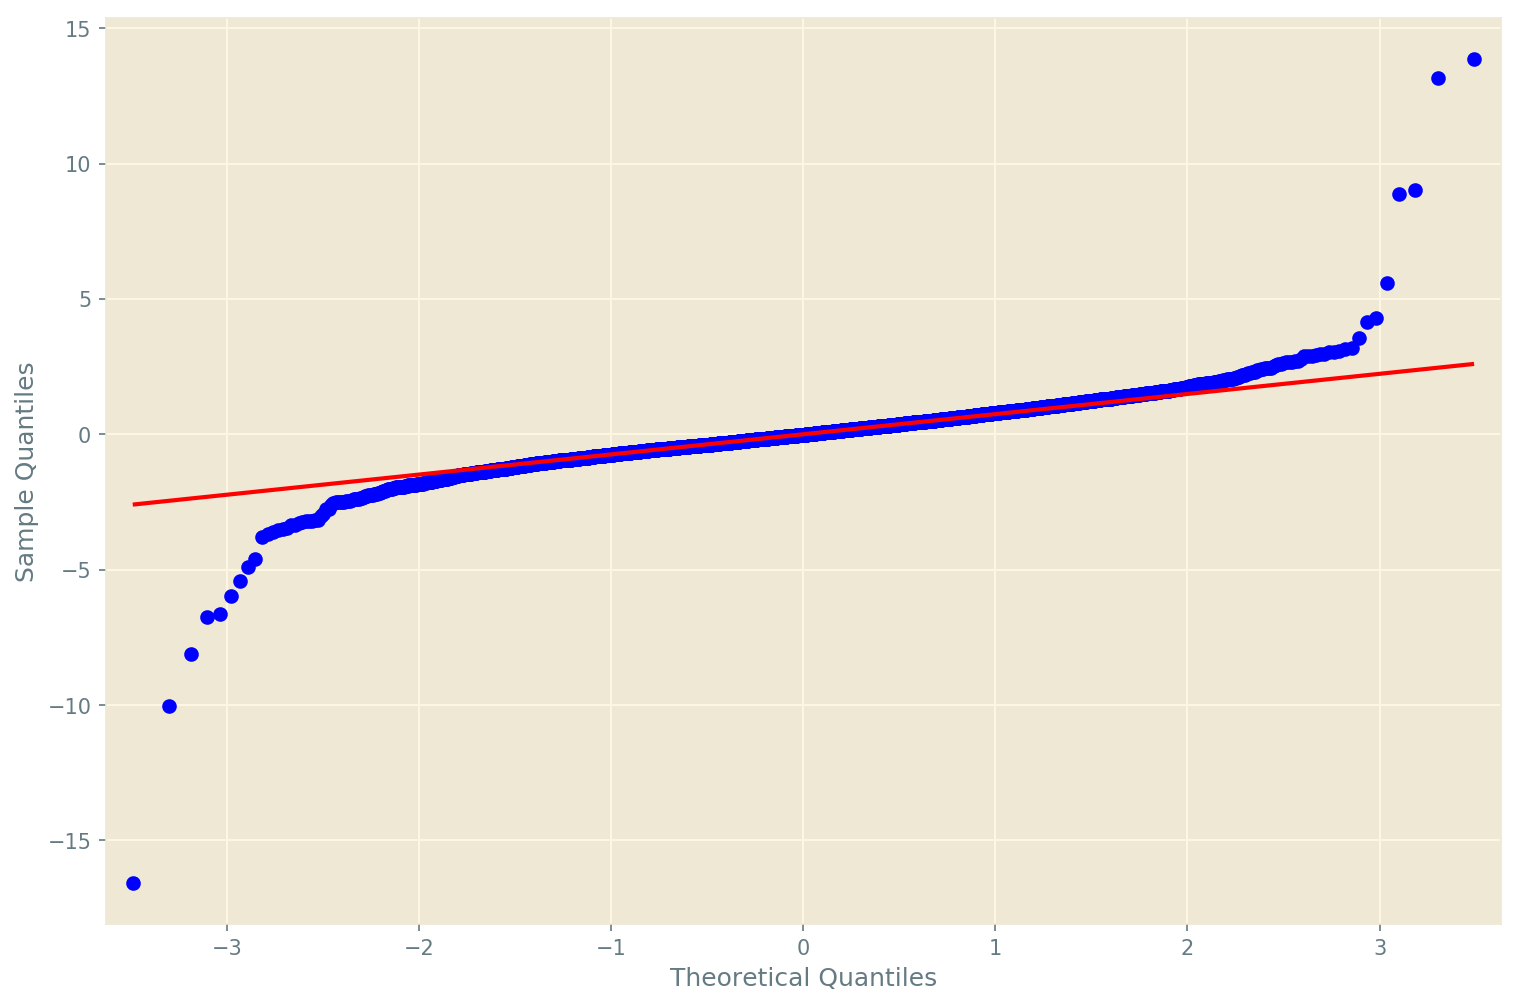

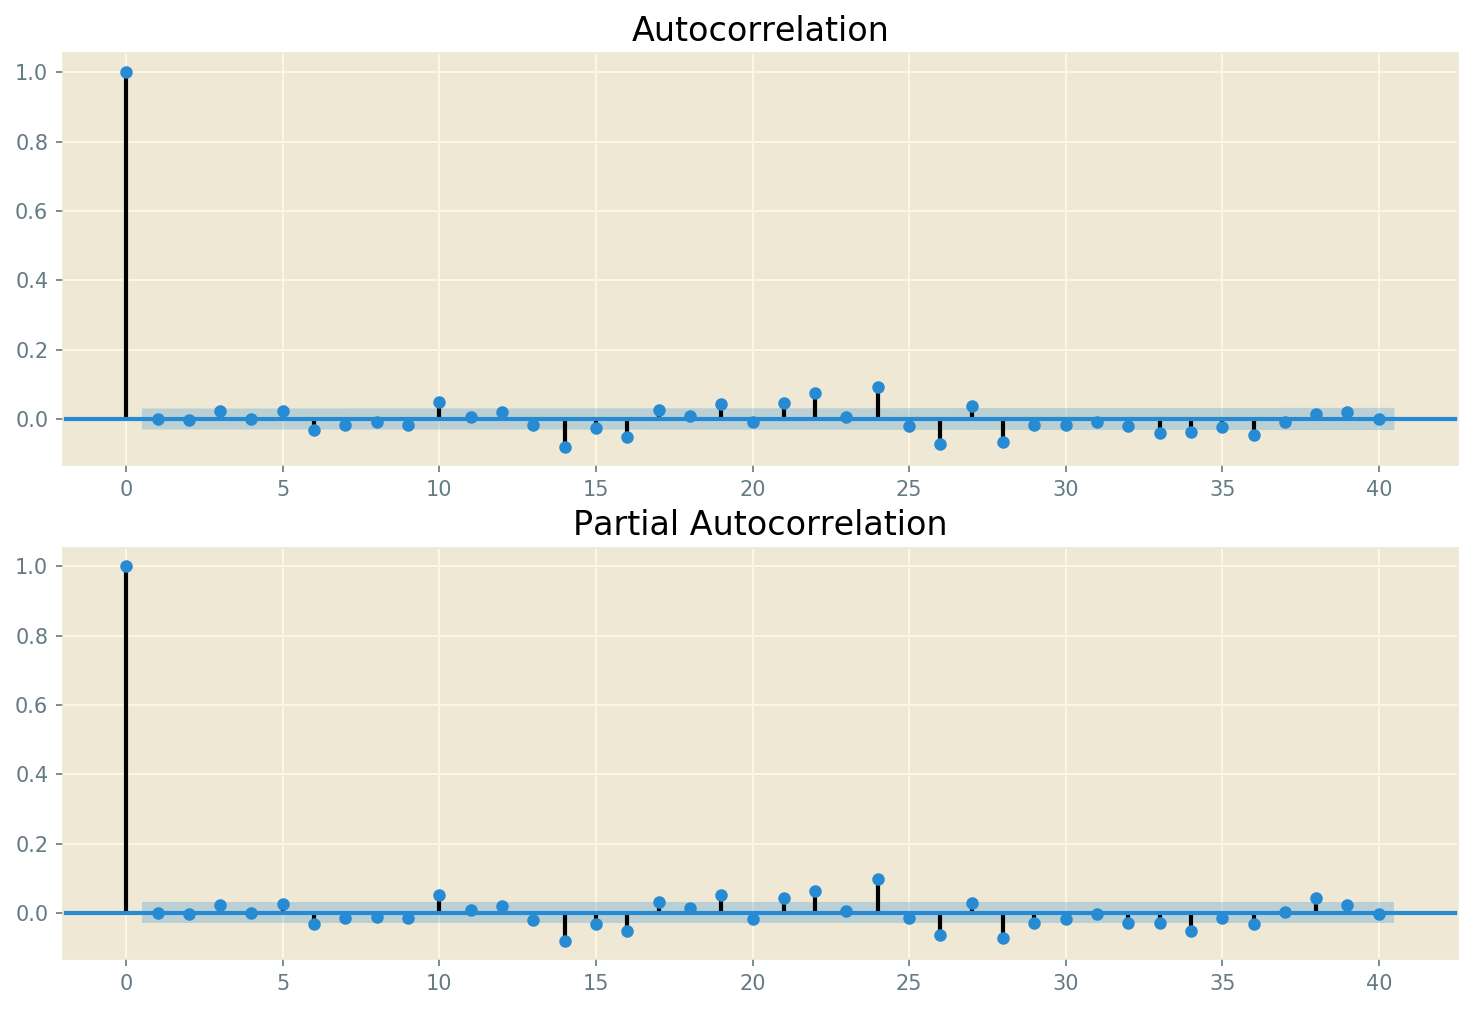

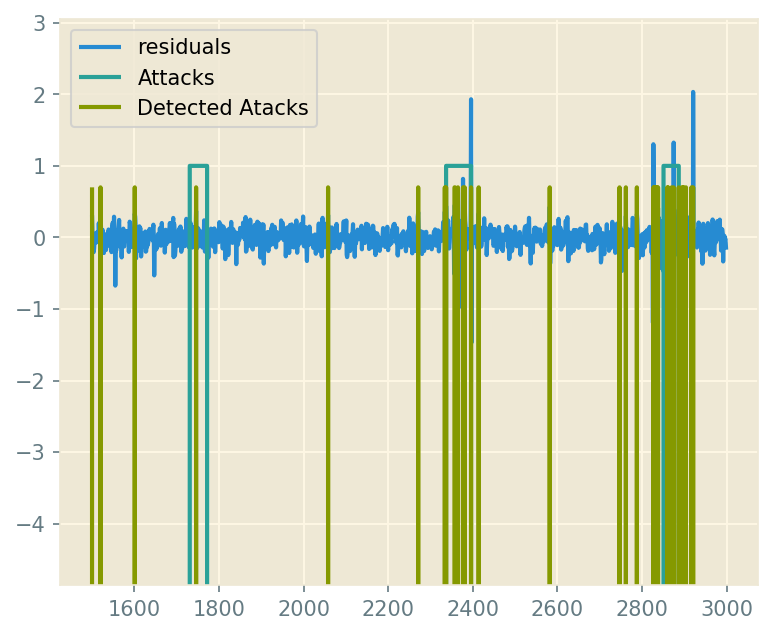

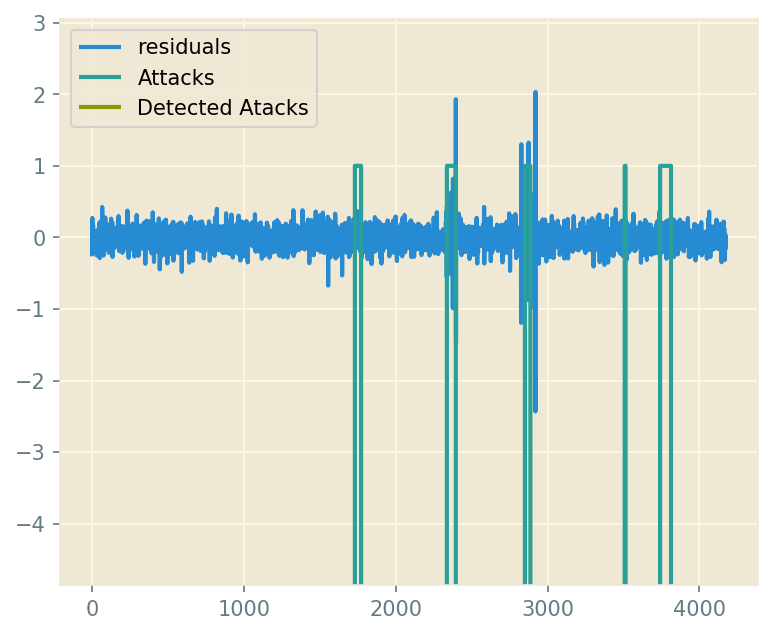

In [63]:
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 4,0
# param_sets = [(4,0), (4,1), (4,2), (4,3), (4, 4), (4,5), (4,6)] # best 4,2
# test_arma_params(df['L_T1'], param_sets)

anomalies, resid = do_arma(df['L_T1'], df_attacks[' L_T1'], (4,2), df_attacks[' ATT_FLAG'])
# zoom in on attacks 3 and 4 specifically
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (1500,3000))

####################################
Current Series: L_T7
####################################
Autocorrelation plots:
TP: 4
FP: 23
Accuracy: 94.30
Precision: 14.81
Recall: 1.83
F_score: 3.25
  


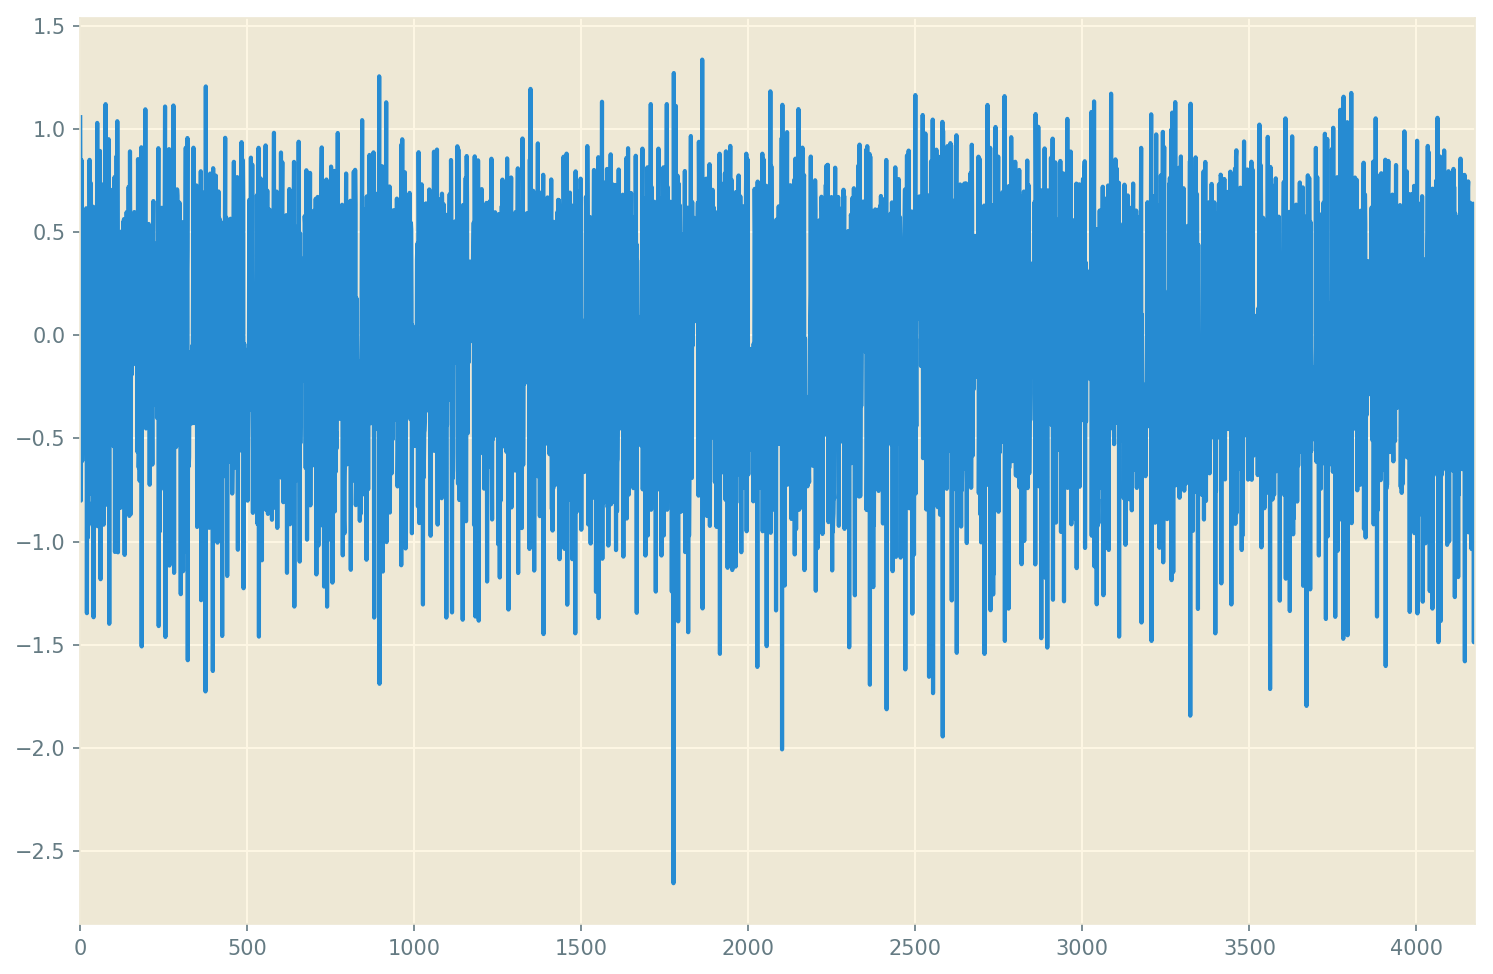

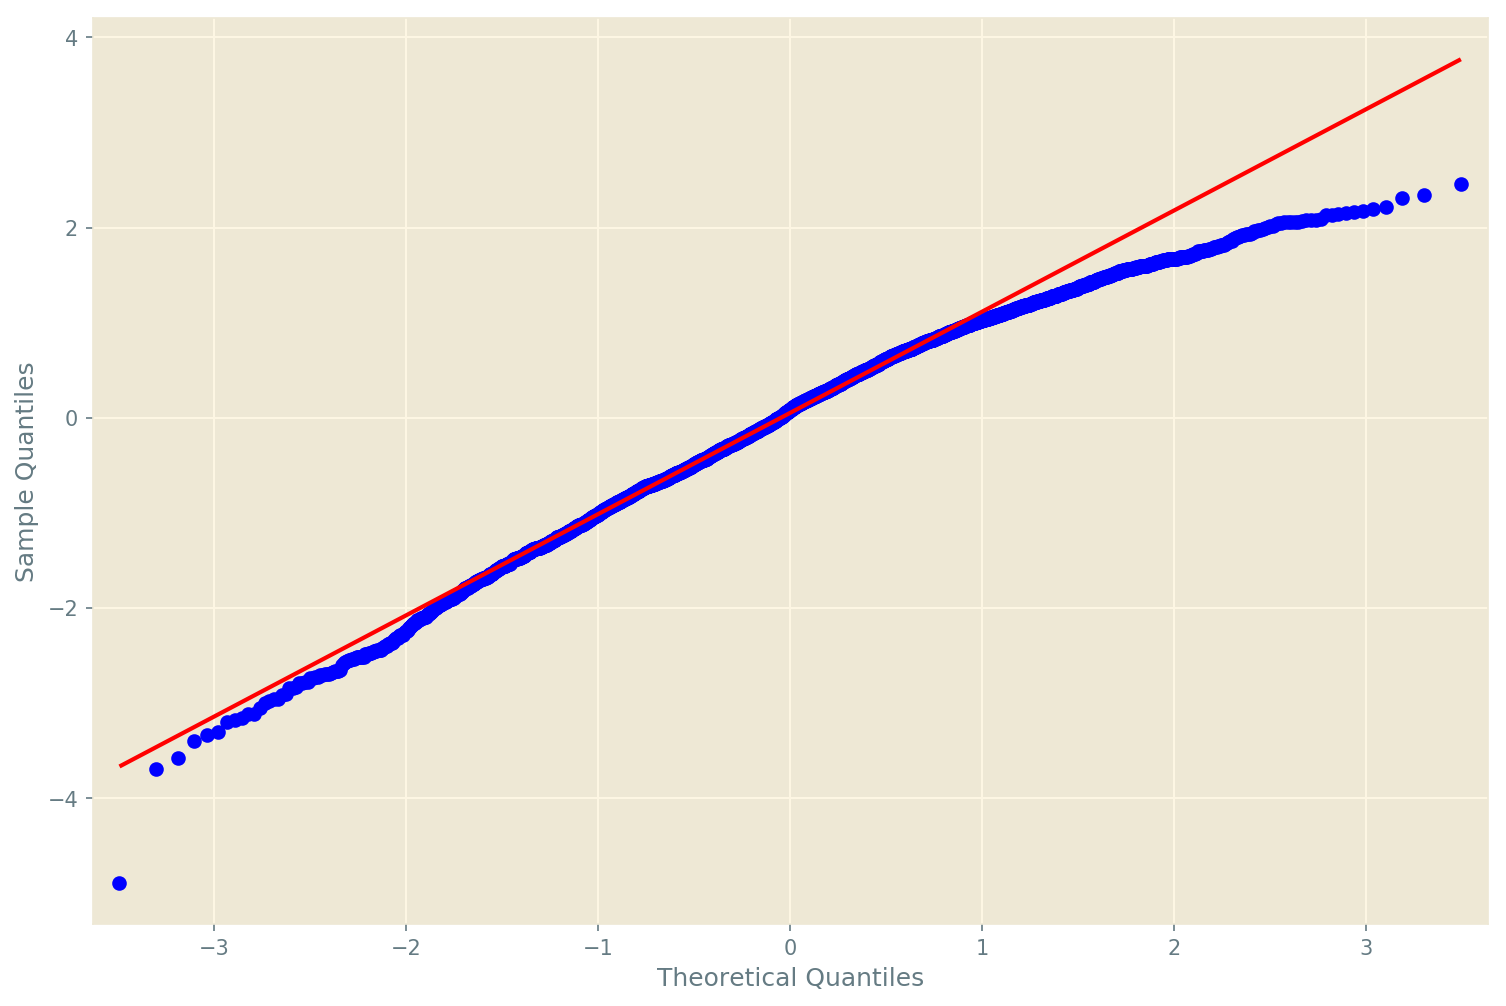

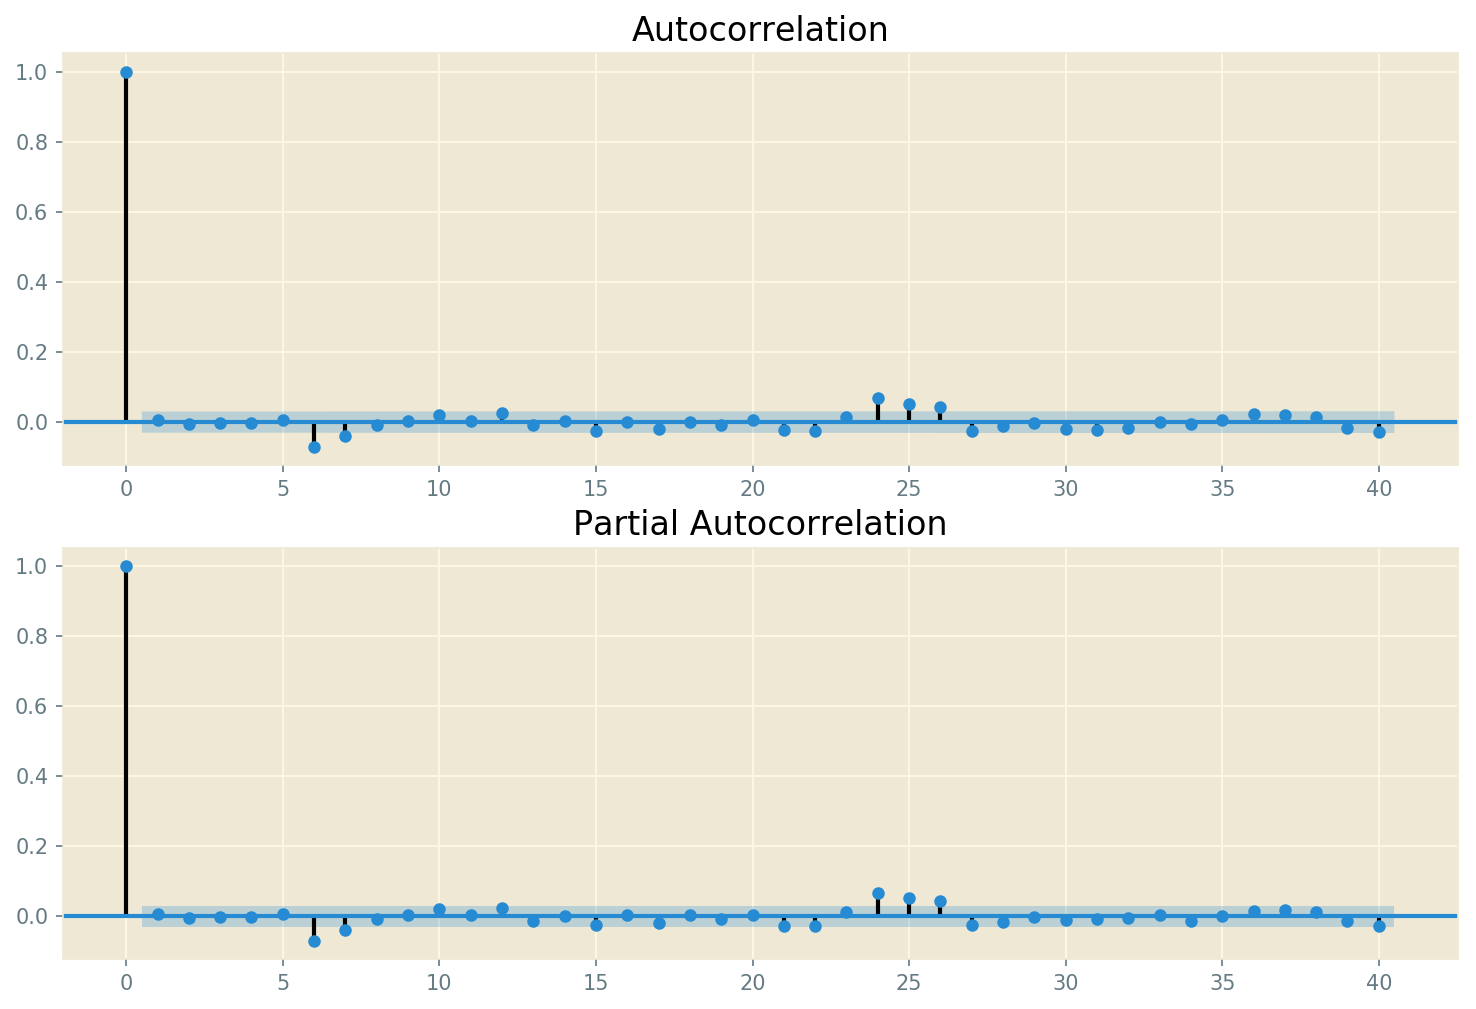

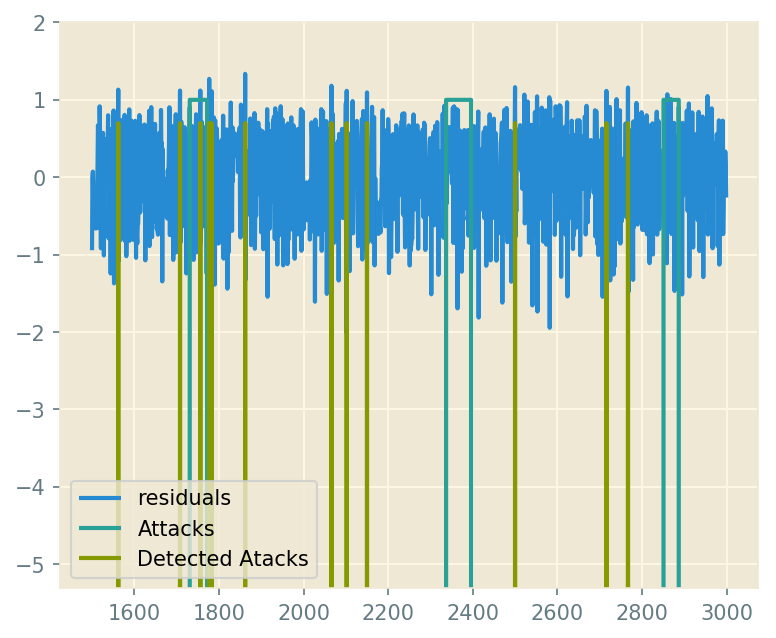

In [69]:
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 3,0
# param_sets = [(3,0), (3,1), (3,2), (3,3), (3, 4), (3,5), (3,6)] # best 3,0 or 3,4
# test_arma_params(df['L_T7'], param_sets)

anomalies, resid = do_arma(df['L_T7'], df_attacks[' L_T7'], (3,0), df_attacks[' ATT_FLAG'])
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (1500,3000))

In [ ]:
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 5,0
# param_sets = [(5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6)] # best 2,4
# test_arma_params(df['P_J300'], param_sets)

anomalies, resid = do_arma(df['P_J300'], df_attacks[' P_J300'], (5,6), df_attacks[' ATT_FLAG'])
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (1500, 3000))

In [ ]:
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 2,0
# param_sets = [(2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6)] # best 2,4
# test_arma_params(df['F_PU10'], param_sets)

anomalies, resid = do_arma(df['F_PU10'], df_attacks[' F_PU10'], (5,6), df_attacks[' ATT_FLAG'])
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies)

first aic is 68524.00877353278
testing (2, 0)
66981.92903885113
Change: -1542.0797346816544, change vs first: -1542.0797346816544
testing (2, 1)
66955.97818325835
Change: -25.950855592775042, change vs first: -1568.0305902744294
testing (2, 2)
66700.7334617602
Change: -255.2447214981512, change vs first: -1823.2753117725806
testing (2, 3)
66672.13506474854
Change: -28.59839701166493, change vs first: -1851.8737087842455
testing (2, 4)
66665.18342407531
Change: -6.951640673229122, change vs first: -1858.8253494574747
testing (2, 5)


## PCA Task

In [ ]:
# Preprocessing
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.decomposition import PCA

df = df.drop('DATETIME', axis=1)

def normalize(df):
    df_normalized = df.copy()
    df_normalized = df_normalized

    normalize = TimeSeriesScalerMeanVariance(mu=0, std=1)
    for col in df:
        df_normalized[col] = normalize.fit_transform(df_normalized[col])[0]

#     for col in df:
#         assert abs(np.mean(df_normalized[col])) < 1e-9
#         assert abs(np.std(df_normalized[col])) < 1 + 1e-10
#         assert abs(np.std(df_normalized[col])) > 1 - 1e-10 or abs(np.std(df_normalized[col])) == 0
    
    return df_normalized

df_normalized = normalize(df)


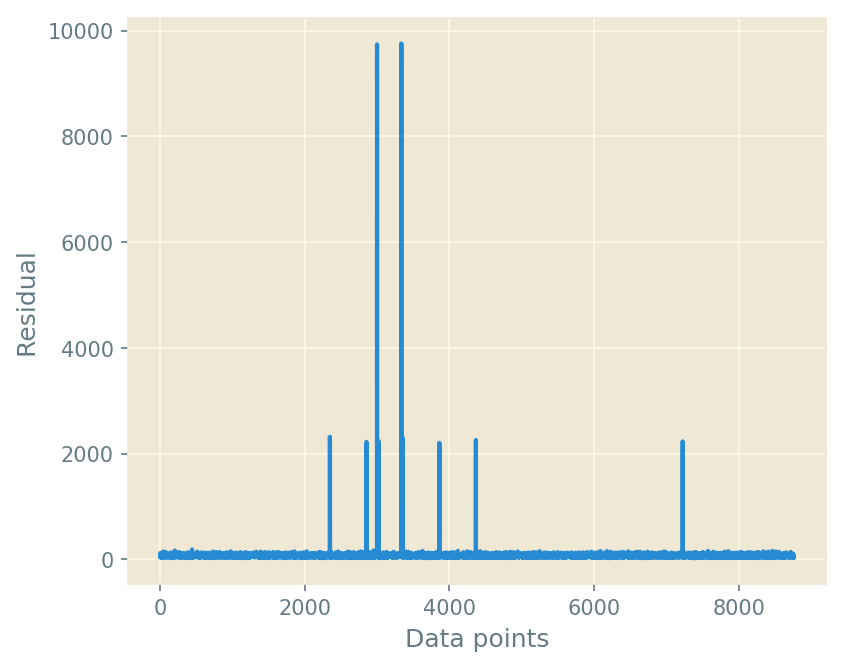

<Figure size 900x750 with 0 Axes>

In [68]:
## Residuals 
pca = PCA()
pca.fit(df_normalized)
df_inverse_transformed = pca.inverse_transform(df_normalized)
pca_residual = df_normalized - df_inverse_transformed
pca_residual = np.square(pca_residual)
pca_residual_combined = pca_residual.sum(axis=1) 

figure, ax = plt.subplots()
plt.xlabel('Data points')
plt.ylabel('Residual')
plt.figure()
ax.plot(pca_residual_combined)
figure.savefig('pcaresidual.png')

In [69]:
## Drop the abnormalities
indices_to_drop = np.where(pca_residual_combined > 2000)
print(indices_to_drop)
index = indices_to_drop[0]
print('before', df_normalized.shape)
df_cleaned = df_normalized.copy()
for index in indices_to_drop:
    row = df.iloc[index]
    df_cleaned = df_normalized.drop(row.index)
print('after', df_cleaned.shape)

(array([2348, 2349, 2350, 2854, 2855, 3000, 3001, 3023, 3024, 3336, 3337,
       3356, 3357, 3358, 3861, 3862, 4365, 4366, 7222, 7223]),)
before (8761, 44)
after (8741, 44)


In [74]:
# Re-normalize
df_cleaned_normalized = normalize(df_cleaned)

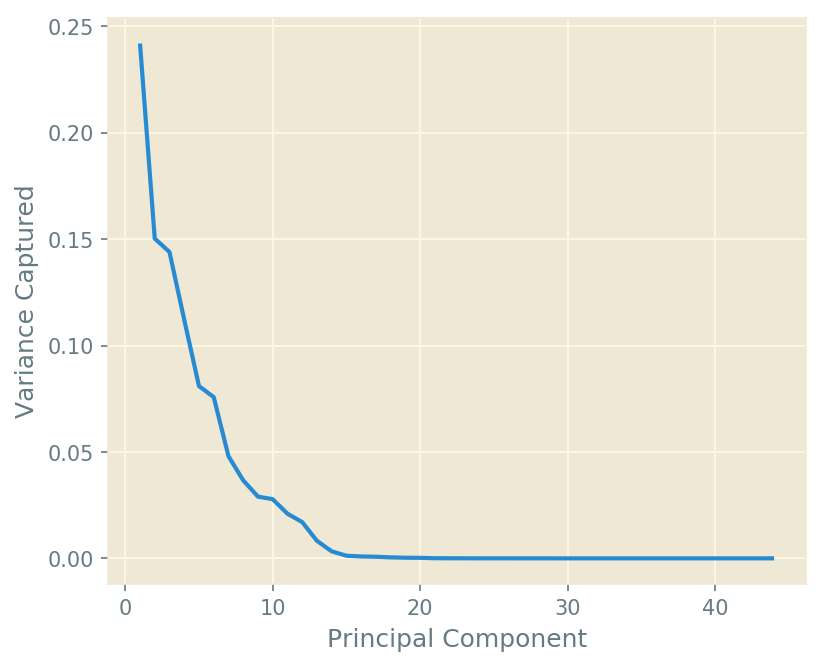

In [79]:
## Find importance of each principal component
pca = PCA()
pca.fit(df_cleaned_normalized)
x_axis = np.arange(1, df_cleaned_normalized.shape[1]+1, 1)
plt.xlabel('Principal Component')
plt.ylabel('Variance Captured')
plt.plot(x_axis, pca.explained_variance_ratio_)

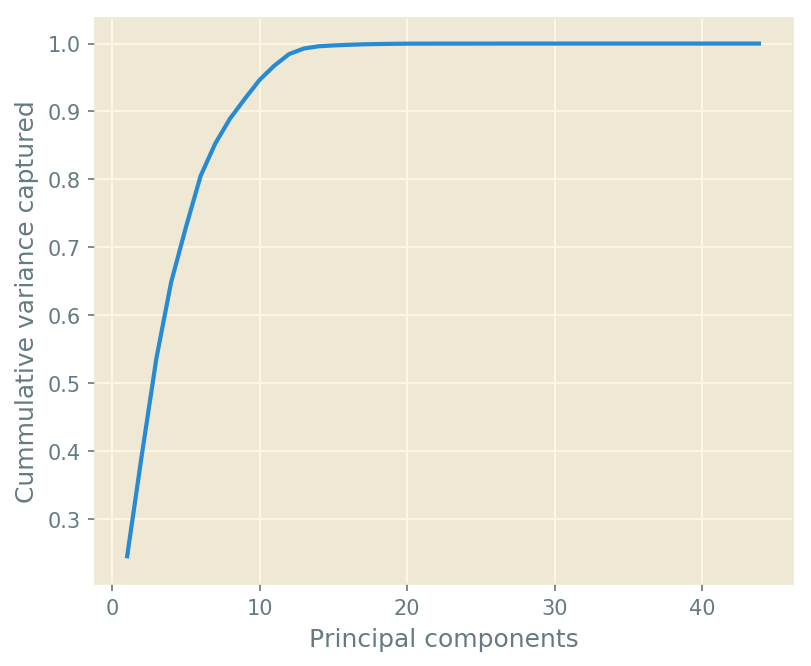

In [80]:
# Cummulative Variance
cummulative_variance = pca.explained_variance_ratio_.cumsum()
x_axis = np.arange(1, df_cleaned_normalized.shape[1]+1, 1)
plt.xlabel('Principal components')
plt.ylabel('Cummulative variance captured')
plt.plot(x_axis, cummulative_variance)

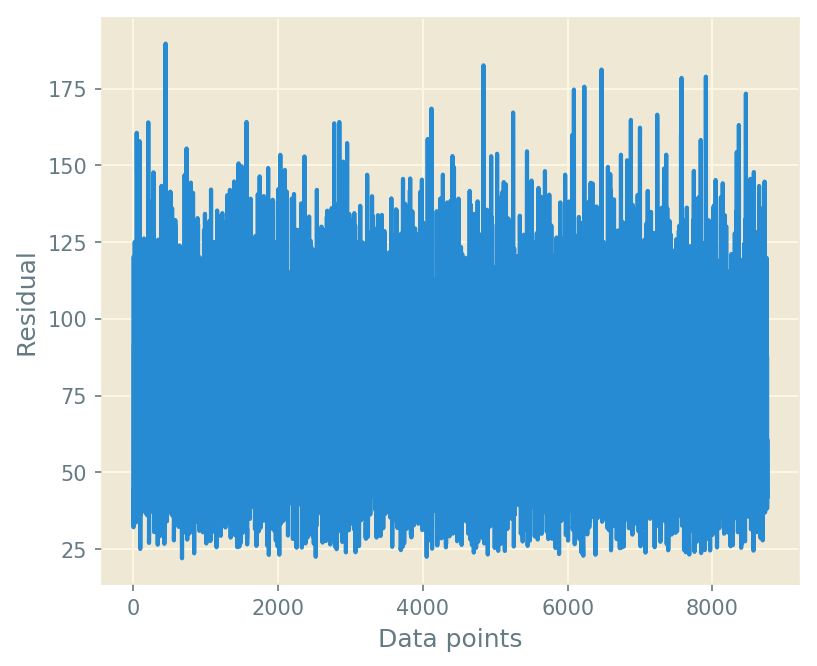

<Figure size 900x750 with 0 Axes>

In [84]:
# Residual is now low
pca = PCA()
pca.fit(df_cleaned_normalized)
df_inverse_transformed = pca.inverse_transform(df_cleaned_normalized)
pca_residual = df_cleaned_normalized - df_inverse_transformed
pca_residual = np.square(pca_residual)
pca_residual_combined = pca_residual.sum(axis=1) 

figure, ax = plt.subplots()
plt.xlabel('Data points')
plt.ylabel('Residual')
plt.figure()
ax.plot(pca_residual_combined)

In [96]:
# Prepare the test dataset
test_dataset = normalize(df_attacks.drop('DATETIME', axis=1).drop(' ATT_FLAG', axis=1))

# Perform PCA analysis

In [174]:
# Find threshold 
pca = PCA(n_components=15)
# pca.fit(df_cleaned_normalized)
transformed = pca.fit_transform(df_cleaned_normalized)
df_inverse_transformed = pca.inverse_transform(transformed)
pca_residual = df_cleaned_normalized - df_inverse_transformed
pca_residual = np.square(pca_residual)
pca_residual_combined = pca_residual.sum(axis=1) 
threshold_max = np.max(pca_residual_combined)
threshold_min = np.min(pca_residual_combined)

# analyse test set
pca = PCA(n_components=15)
pca.fit(test_dataset)
transformed = pca.fit_transform(test_dataset)
reconstructed = pca.inverse_transform(transformed)

residual_pca = test_dataset - reconstructed
residual_pca = np.square(residual_pca)
residual_pca = residual_pca.sum(axis=1) 

# Find attacks
attack_indices = np.where((residual_pca > threshold_max))
attack_indices2 = np.where((residual_pca < threshold_min))

all_detected_attacks = np.append(attack_indices[0], attack_indices2[0])

TP = 0
FP = 0
for index in all_detected_attacks:
    if index in list(df_attacks.loc[df_attacks[' ATT_FLAG']==1].index):
        TP +=1
    else:
        FP +=1 
        
residual_pca[2893] > threshold_max
2893 in all_detected_attacks
print(f'TP={TP}\nFP={FP}')

TP=26
FP=119


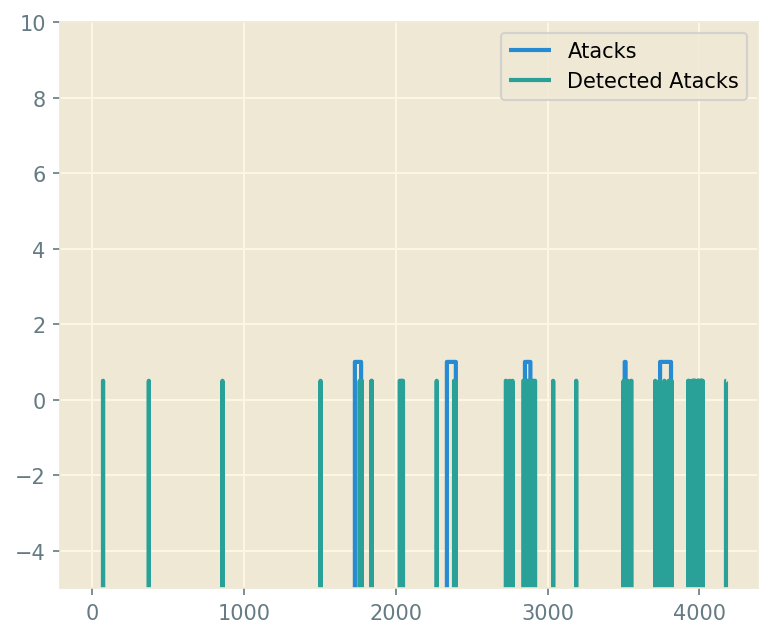

In [182]:
def plot_attacks(residuals, attacks, detected_anomalies):
    show_from = 0
    show_to = 5000
    detected_attacks = []
    for a in range(len(df_attacks)):
            if a in detected_anomalies:
                detected_attacks.append(0.5)
            else:
                detected_attacks.append(-99)

    detected_attacks = pd.DataFrame(detected_attacks)
    plt.figure()
    residuals = residuals - np.mean(residuals)
#     plt.plot(residuals[show_from:show_to], label="residuals (normalized)")
    plt.plot(attacks[show_from:show_to], label="Atacks")
    plt.plot(detected_attacks[show_from:show_to], label="Detected Atacks")

    axes = plt.gca()
    axes.set_ylim([-5,10])
    plt.legend()
    plt.show()
    
plot_attacks(residual_pca, df_attacks[' ATT_FLAG'], all_detected_attacks)

In [183]:

# df_attacks.set_index("DATETIME")[" ATT_FLAG"]["09/10/16 07":"11/10/16 23"]
